In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-credit-default-risk/sample_submission.csv
/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/bureau.csv


> # <font color='green'>**Importing Libraries**</font>


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

> # <font color='green'>**Laoding dataset**</font>


In [3]:
home_des=pd.read_csv("../input/home-credit-default-risk/HomeCredit_columns_description.csv",encoding='Latin-1')
pd.DataFrame(home_des)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


In [4]:
#pos_cash=pd.read_csv("../input/home-credit-default-risk/POS_CASH_balance.csv")
#pos_cash

In [5]:
app_test=pd.read_csv("../input/home-credit-default-risk/application_test.csv")
#app_test

In [6]:
app_train=pd.read_csv("../input/home-credit-default-risk/application_train.csv")
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#bur=pd.read_csv("../input/home-credit-default-risk/bureau.csv")
#bur

In [8]:
#bur_bal=pd.read_csv("../input/home-credit-default-risk/bureau_balance.csv")
#bur_bal

In [9]:
#cc_bal=pd.read_csv("../input/home-credit-default-risk/credit_card_balance.csv")
#cc_bal

In [10]:
#inst_pay=pd.read_csv("../input/home-credit-default-risk/installments_payments.csv")
#inst_pay

In [11]:
#pre_app=pd.read_csv("../input/home-credit-default-risk/previous_application.csv")
#pre_app

In [12]:
#s_sub=pd.read_csv("../input/home-credit-default-risk/sample_submission.csv")
#s_sub

> # <font color='green'>**Data preposcessing**</font>


In [13]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [14]:
app_train.shape

(307511, 122)

In [15]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [16]:
(app_train.isnull().sum()).sort_values()

SK_ID_CURR                          0
HOUR_APPR_PROCESS_START             0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
                                ...  
NONLIVINGAPARTMENTS_MEDI       213514
NONLIVINGAPARTMENTS_MODE       213514
COMMONAREA_MODE                214865
COMMONAREA_AVG                 214865
COMMONAREA_MEDI                214865
Length: 122, dtype: int64

In [17]:
app_train.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")


,count,mean,std,min,25%,50%,75%,max
AMT_CREDIT,307511.000000,599025.999706,402490.776996,45000.000000,270000.000000,513531.000000,808650.000000,4050000.000000
AMT_GOODS_PRICE,307233.000000,538396.207429,369446.460540,40500.000000,238500.000000,450000.000000,679500.000000,4050000.000000
SK_ID_CURR,307511.000000,278180.518577,102790.175348,100002.000000,189145.500000,278202.000000,367142.500000,456255.000000
AMT_INCOME_TOTAL,307511.000000,168797.919297,237123.146279,25650.000000,112500.000000,147150.000000,202500.000000,117000000.000000
DAYS_EMPLOYED,307511.000000,63815.045904,141275.766519,-17912.000000,-2760.000000,-1213.000000,-289.000000,365243.000000
AMT_ANNUITY,307499.000000,27108.573909,14493.737315,1615.500000,16524.000000,24903.000000,34596.000000,258025.500000
HOUR_APPR_PROCESS_START,307511.000000,12.063419,3.265832,0.000000,10.000000,12.000000,14.000000,23.000000
OWN_CAR_AGE,104582.000000,12.061091,11.944812,0.000000,5.000000,9.000000,15.000000,91.000000
CNT_FAM_MEMBERS,307509.000000,2.152665,0.910682,1.000000,2.000000,2.000000,3.000000,20.000000
REGION_RATING_CLIENT,307511.000000,2.052463,0.509034,1.000000,2.000000,2.000000,2.000000,3.000000


In [18]:
app_train.describe(include='object').T.sort_values(ascending = 0,by = "top").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["freq"], color ="crimson").bar(subset = ["unique"], color ="orange").bar(subset = ["count"], color ="pink")

,count,unique,top,freq
FONDKAPREMONT_MODE,97216,4,reg oper account,73830
HOUSETYPE_MODE,153214,3,block of flats,150503
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
WEEKDAY_APPR_PROCESS_START,307511,7,TUESDAY,53901
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
WALLSMATERIAL_MODE,151170,7,Panel,66040
EMERGENCYSTATE_MODE,161756,2,No,159428
FLAG_OWN_CAR,307511,2,N,202924


> **Handling missing values**

In [19]:
for tr in app_train.describe(include='object').columns:
    app_train[tr]=app_train[tr].fillna((app_train[tr].mode()))

In [20]:
for ci in app_train.describe().columns:
    app_train[ci]=app_train[ci].fillna((app_train[ci].median()))

In [21]:
app_test.isnull().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

In [22]:
for te in app_test.describe(include='object').columns:
    app_test[te]=app_test[te].fillna((app_test[te].mode()))


In [23]:
for tt in app_test.describe().columns:
    app_test[tt]=app_test[tt].fillna((app_test[tt].median()))

In [24]:
app_train.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [25]:
app_test.isnull().sum()

SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 121, dtype: int64

> **Analysing train dataset**

In [26]:
for j in app_train.columns:
    print(j.capitalize())
    print('Number of Unique values:',app_train[j].nunique())
    print("Value Count of ",j.capitalize())
    print(app_train[j].value_counts())
    print("")
    print("**********************************************************************************")
    print("")

Sk_id_curr
Number of Unique values: 307511
Value Count of  Sk_id_curr
100002    1
337664    1
337661    1
337660    1
337659    1
         ..
218992    1
218991    1
218990    1
218989    1
456255    1
Name: SK_ID_CURR, Length: 307511, dtype: int64

**********************************************************************************

Target
Number of Unique values: 2
Value Count of  Target
0    282686
1     24825
Name: TARGET, dtype: int64

**********************************************************************************

Name_contract_type
Number of Unique values: 2
Value Count of  Name_contract_type
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

**********************************************************************************

Code_gender
Number of Unique values: 3
Value Count of  Code_gender
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

**************************************************************************

In [27]:
type(app_train.columns)

pandas.core.indexes.base.Index

> # <font color='green'>**Data Visualization**</font>


In [28]:
l1=[]
l2=[]
for k in app_train.columns:
    if (app_train[k].nunique())<100:
        l1.append(k)
    else:
        l2.append(k)

Histograms of dataset


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


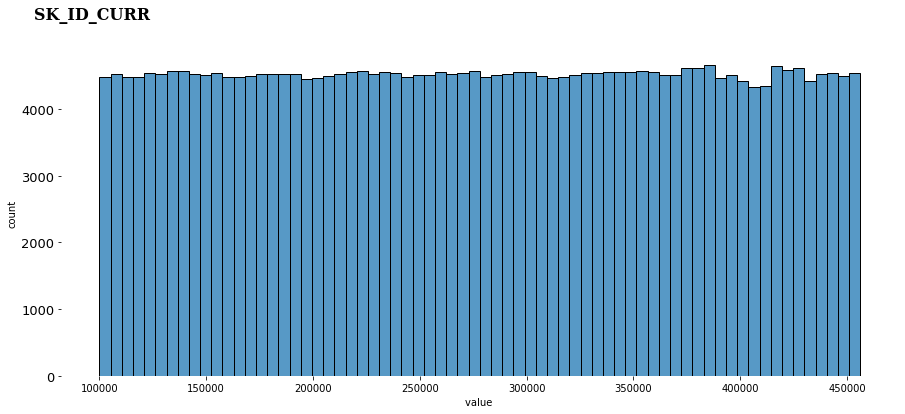

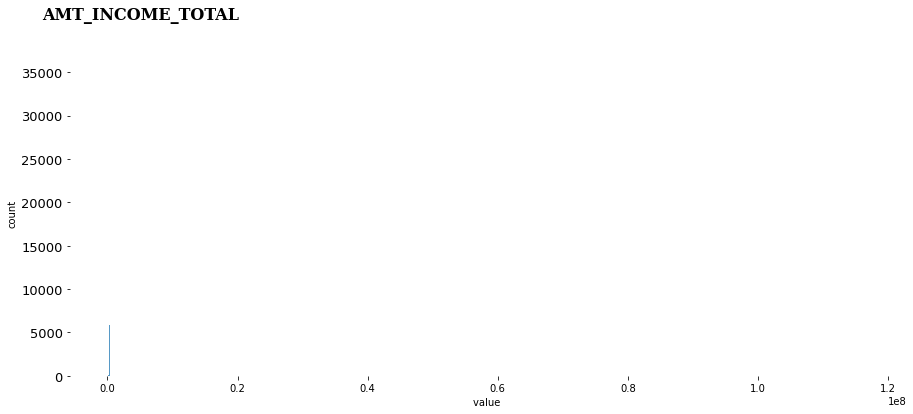

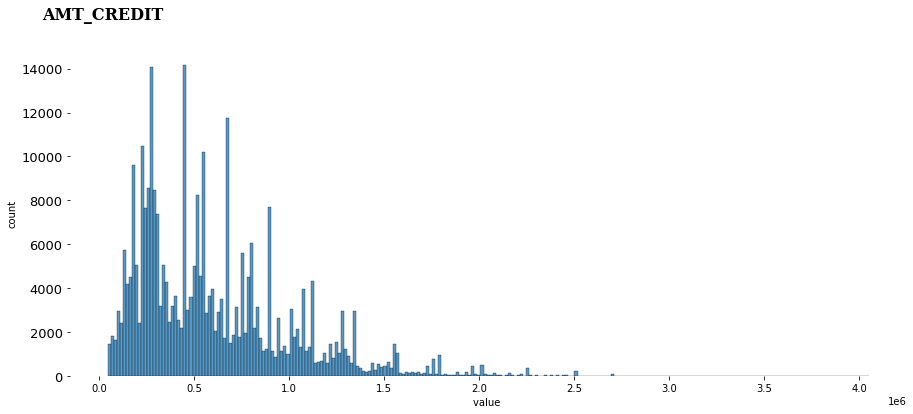

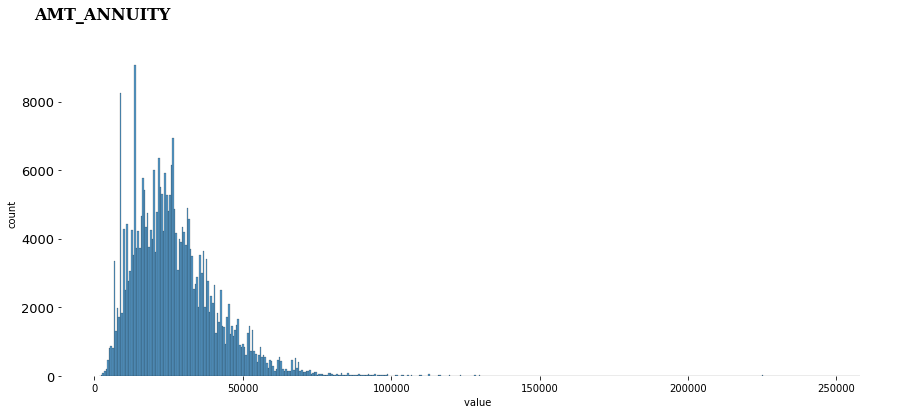

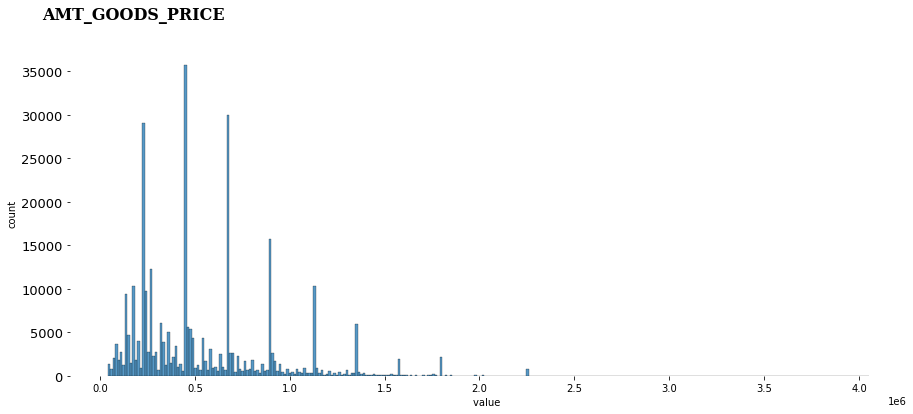

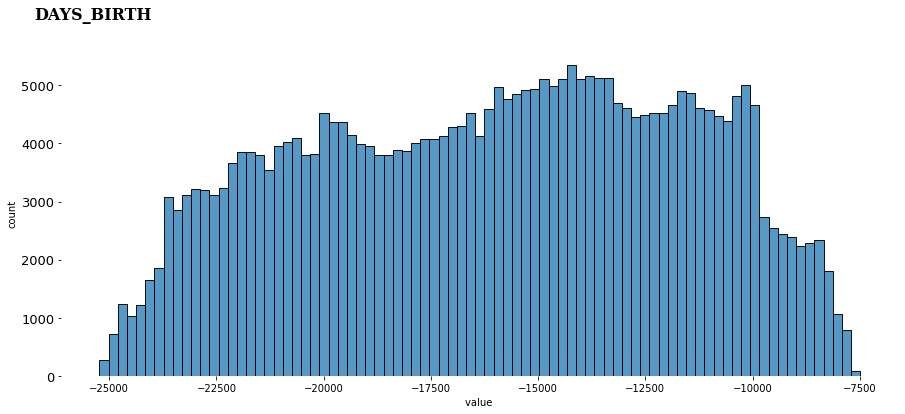

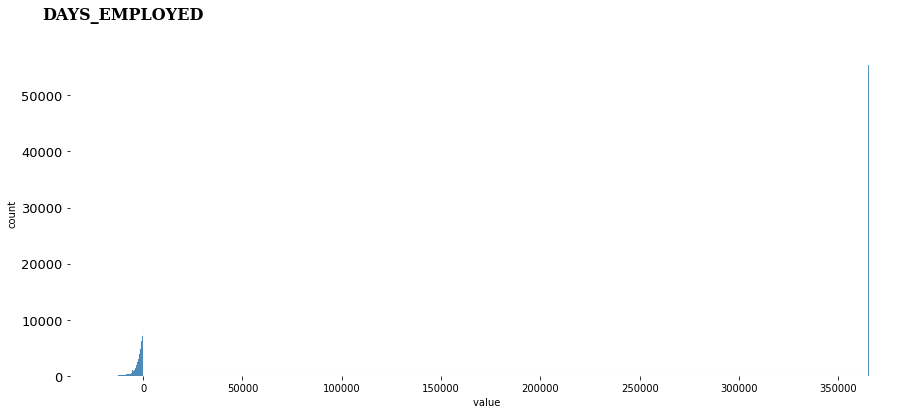

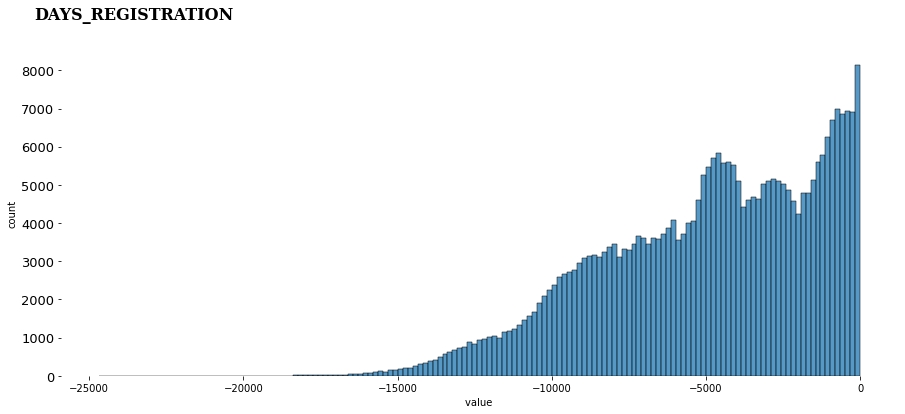

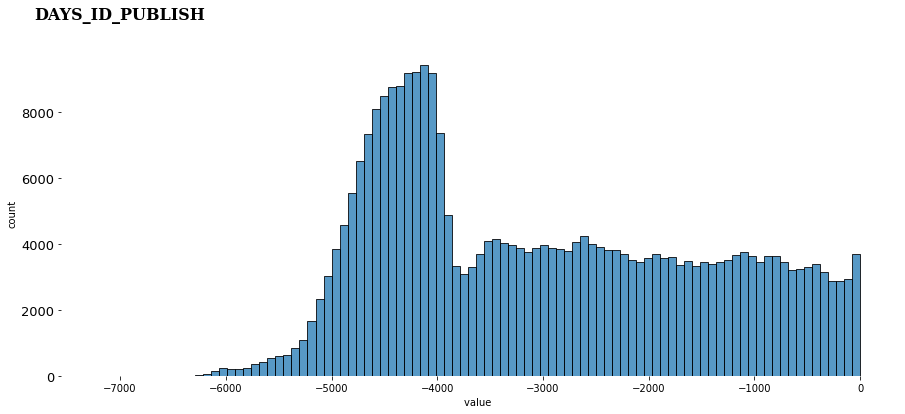

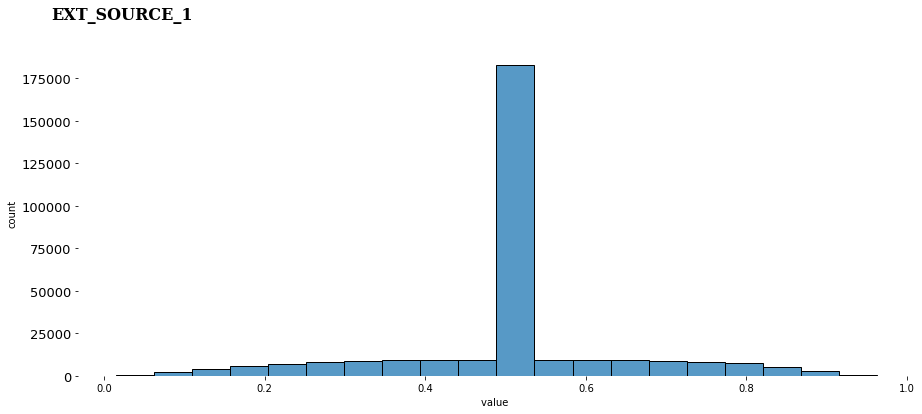

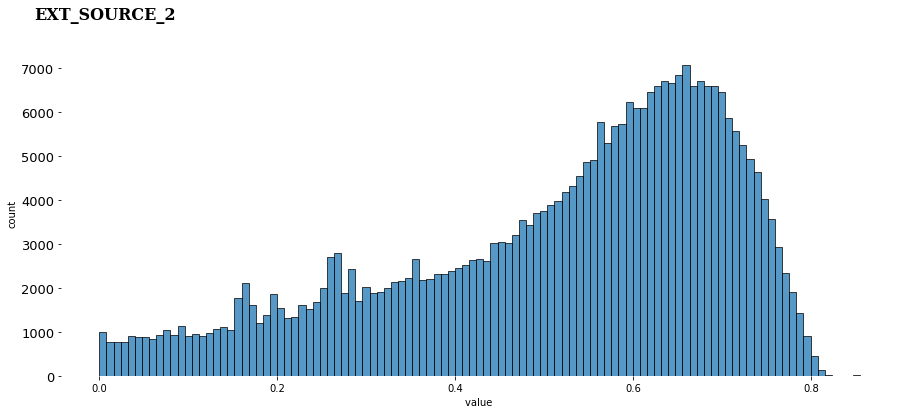

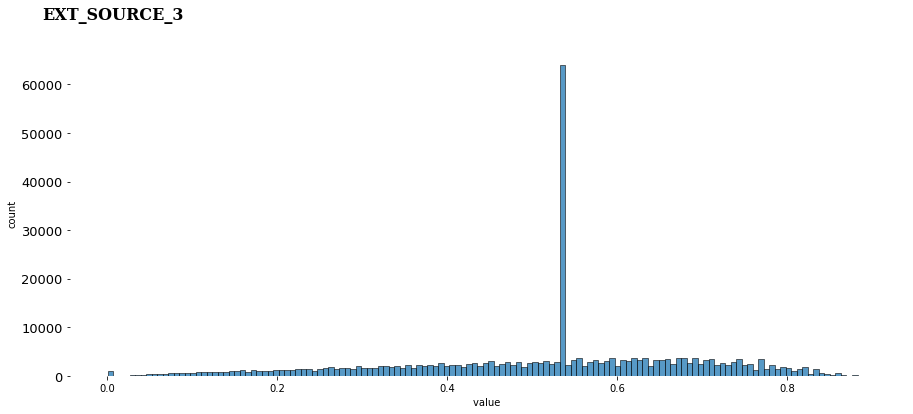

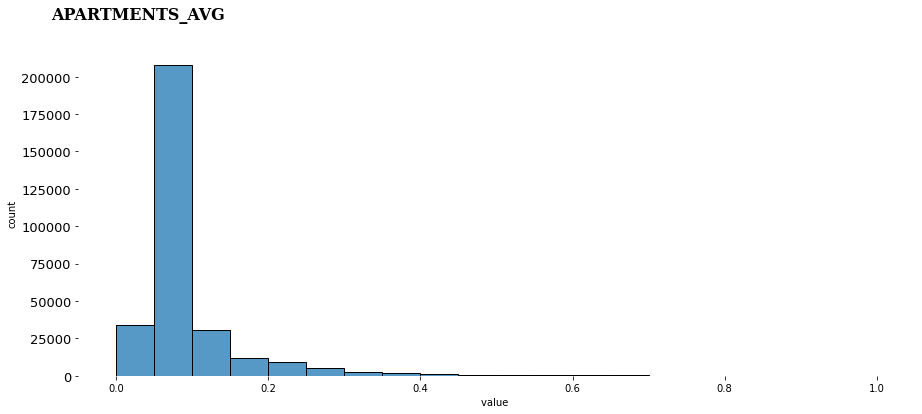

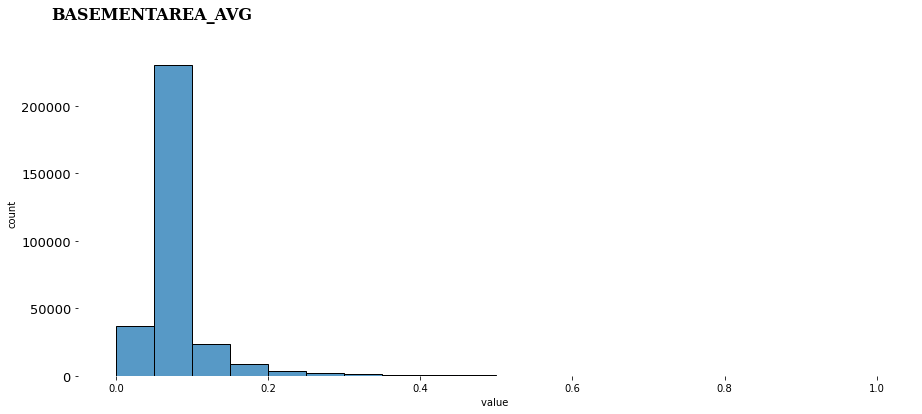

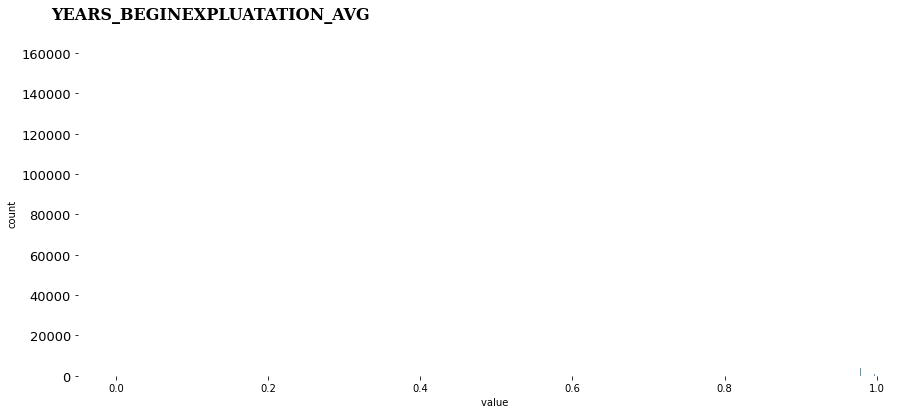

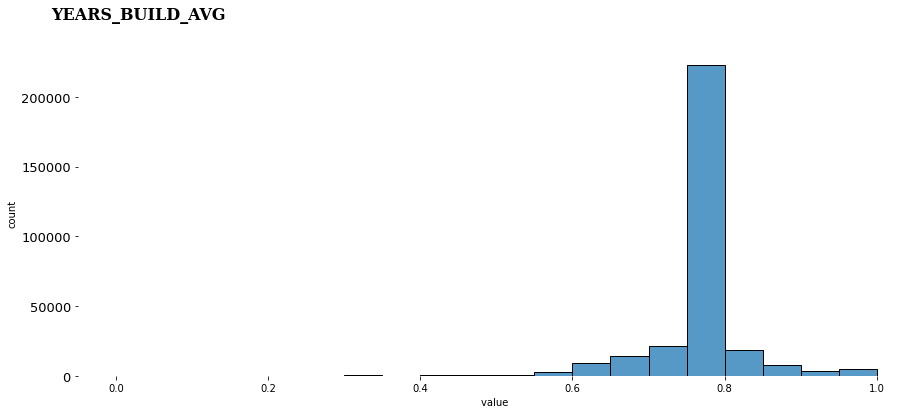

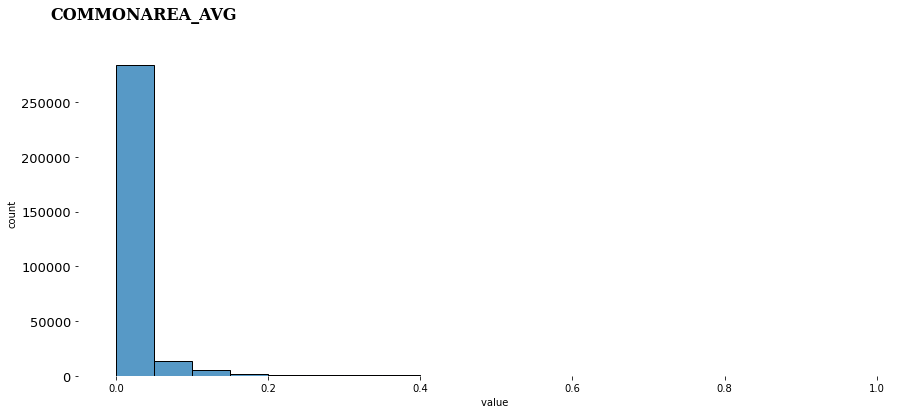

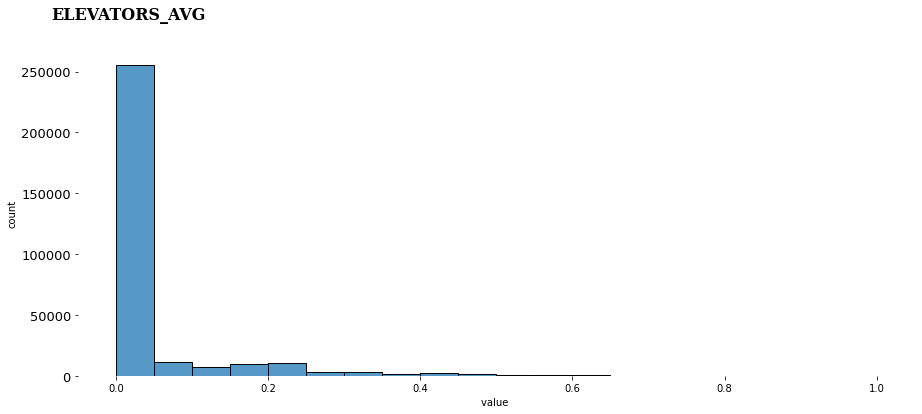

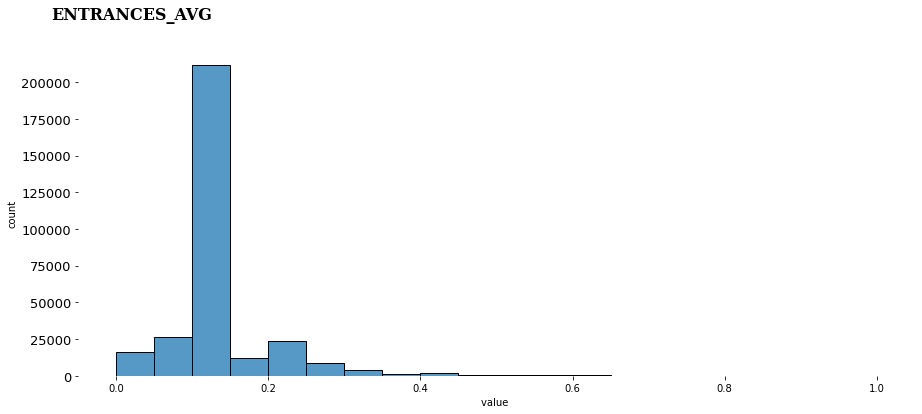

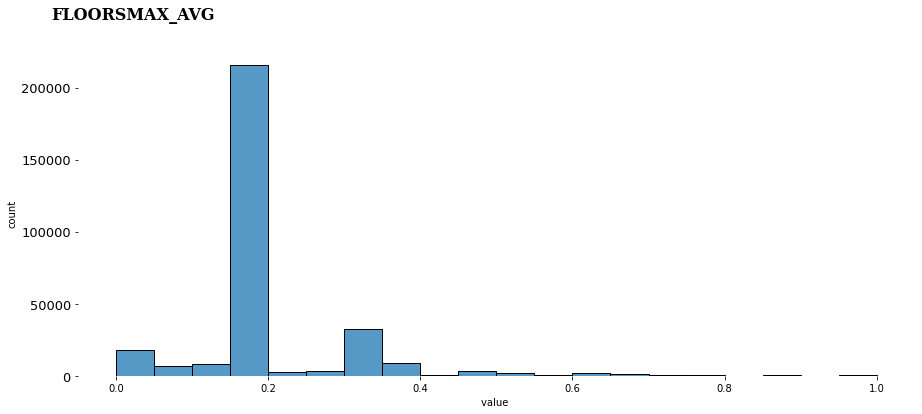

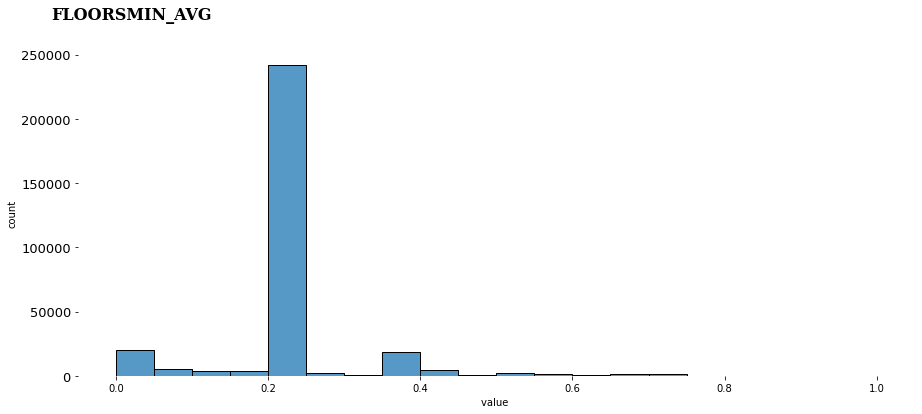

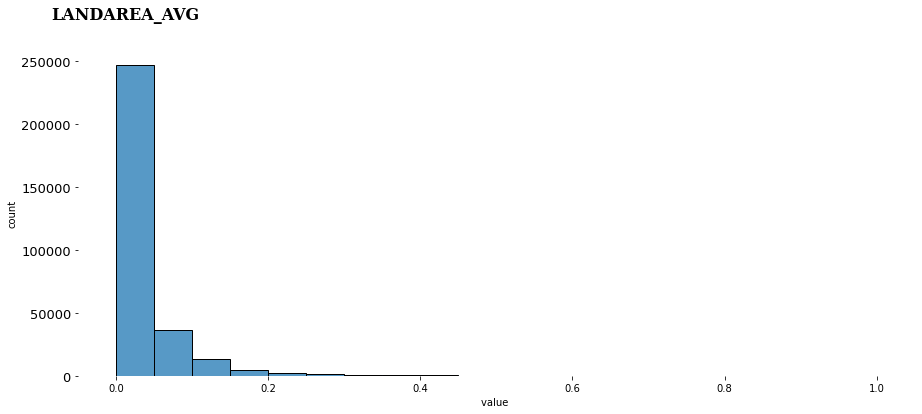

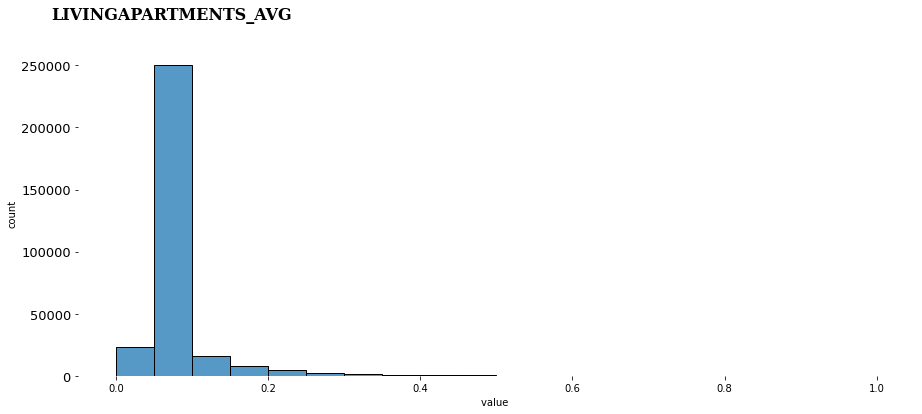

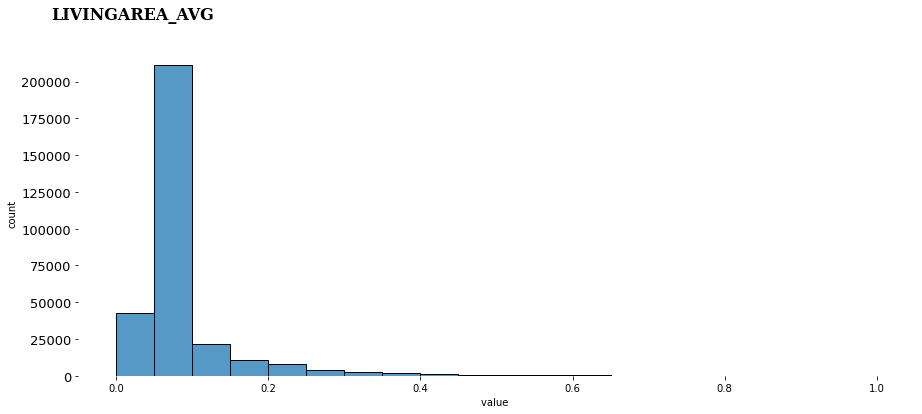

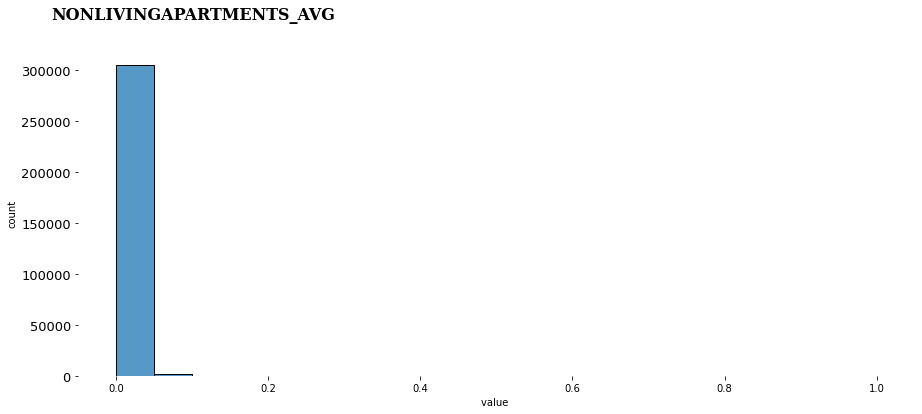

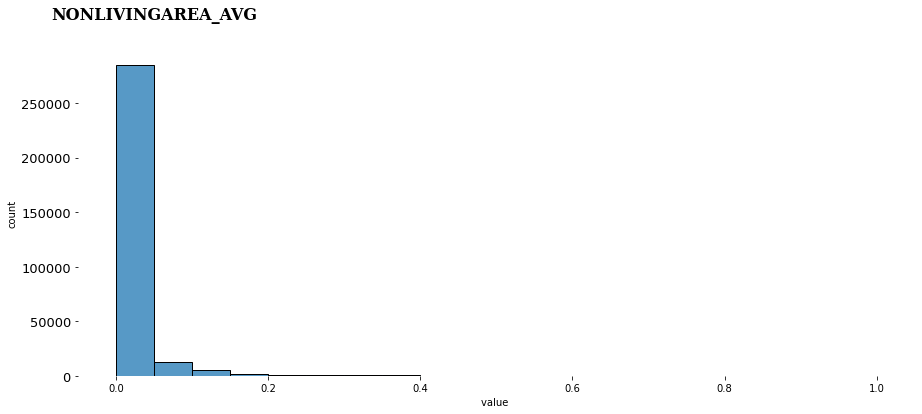

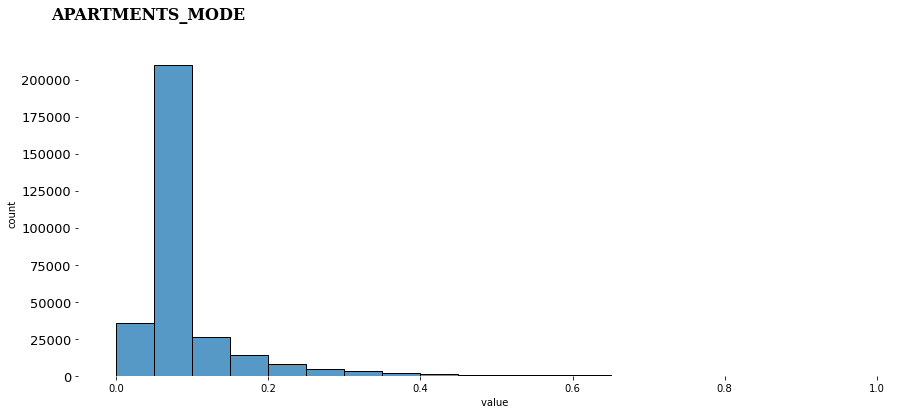

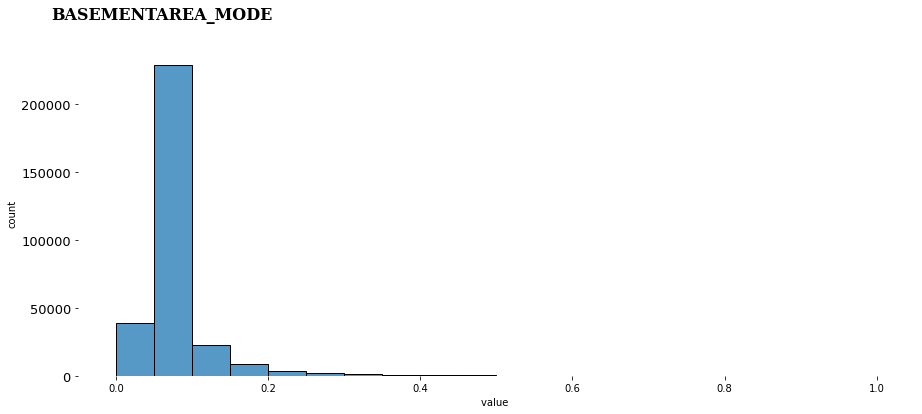

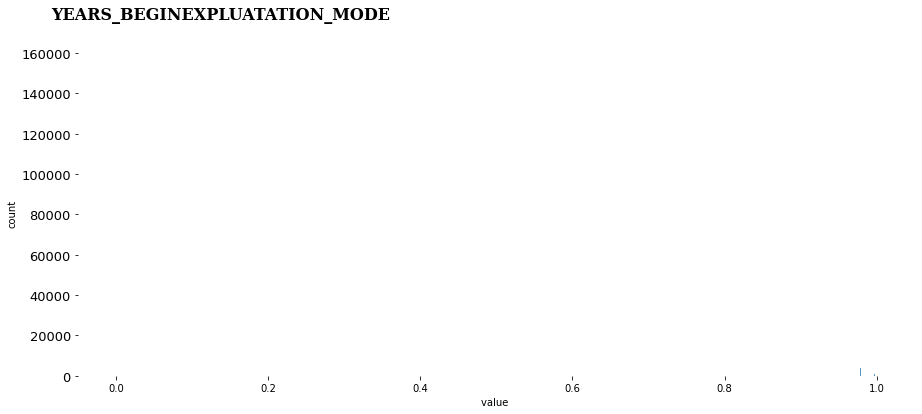

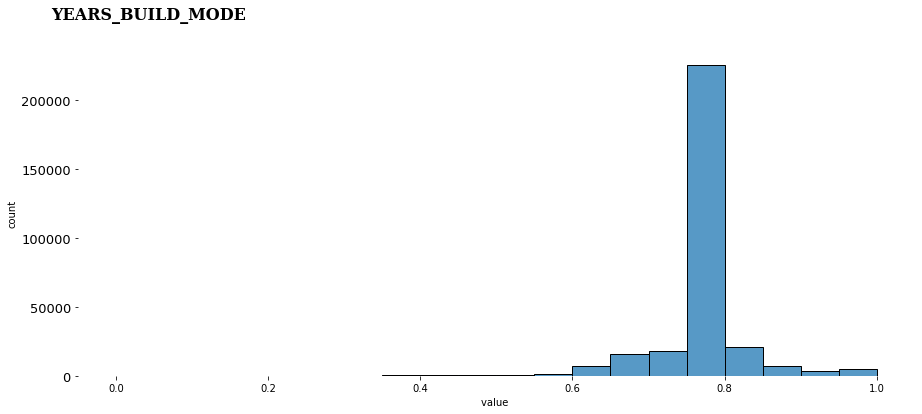

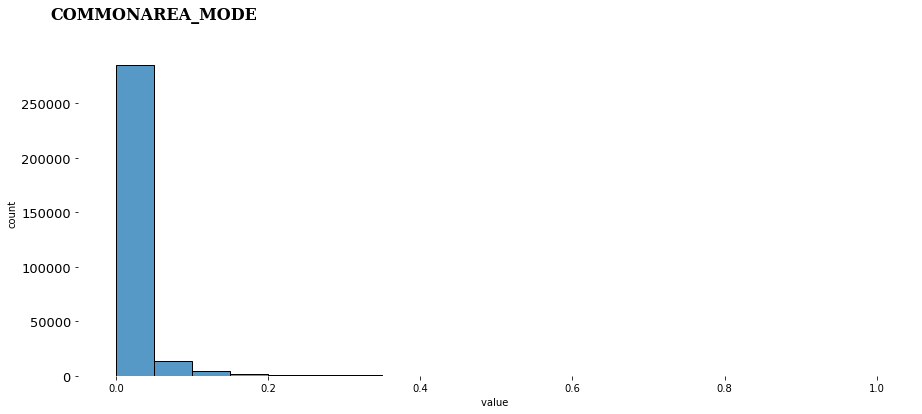

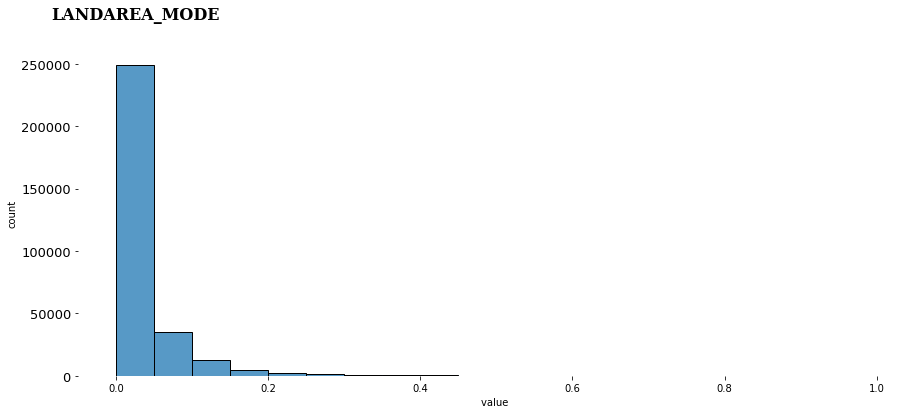

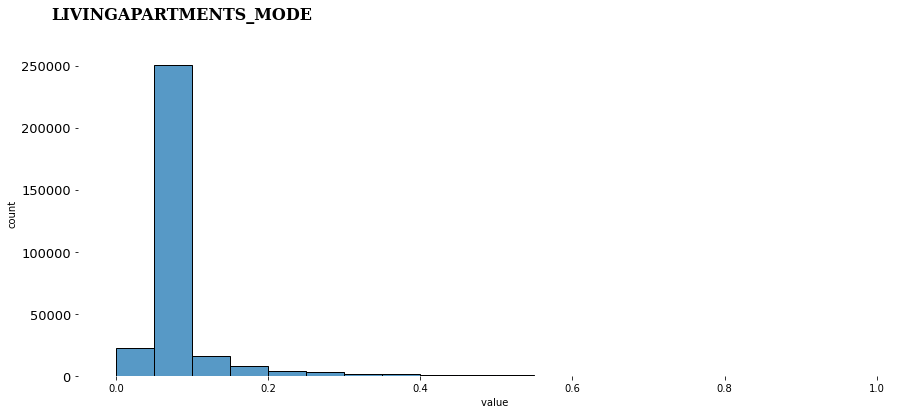

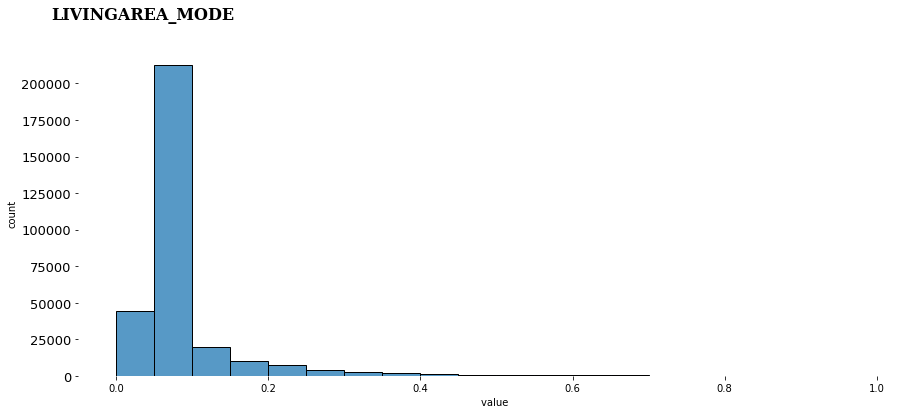

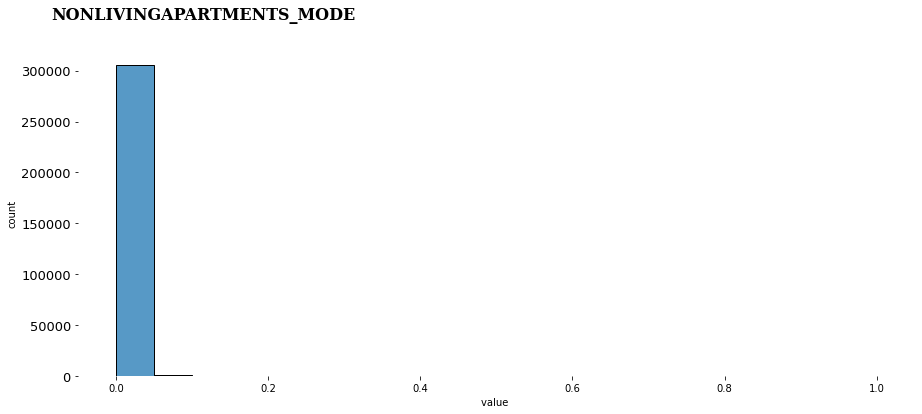

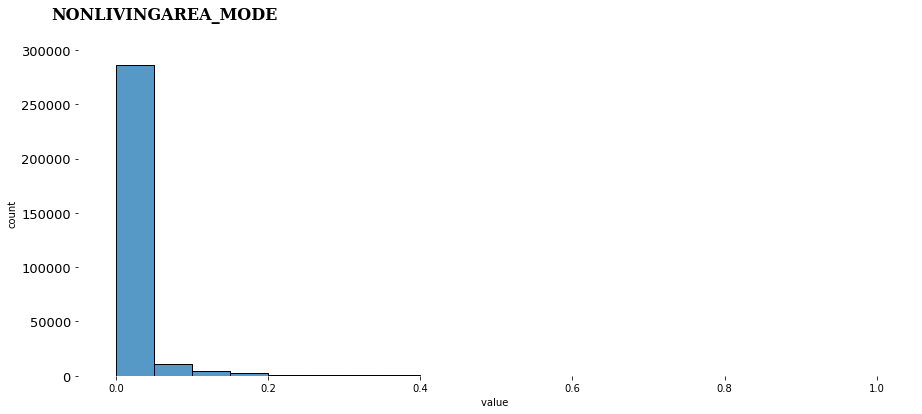

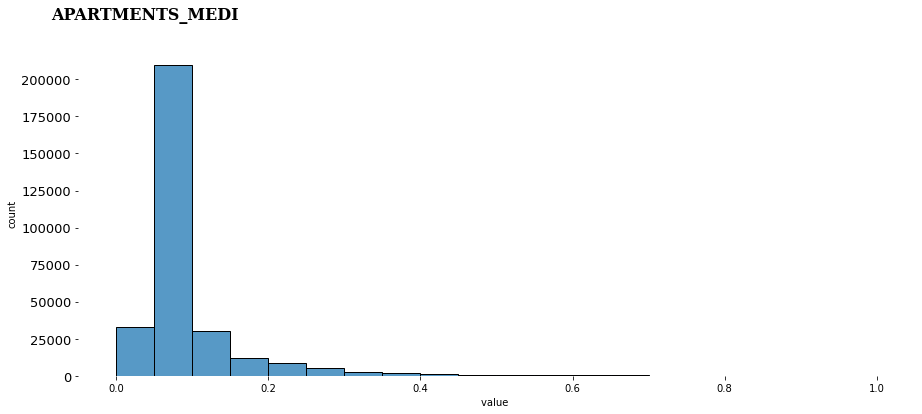

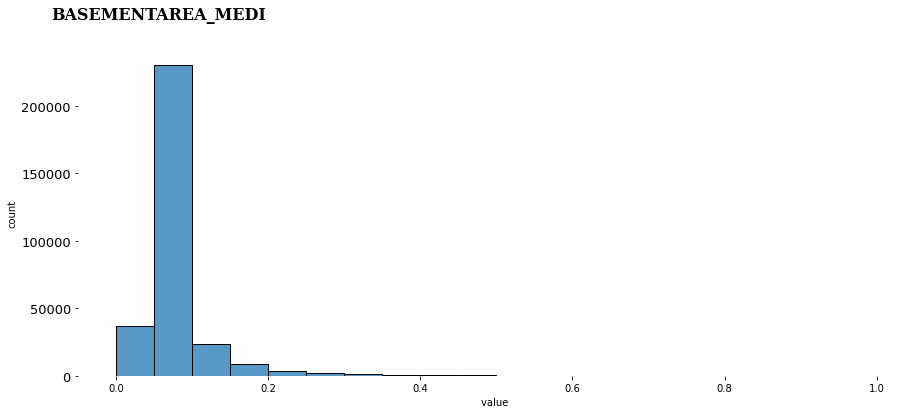

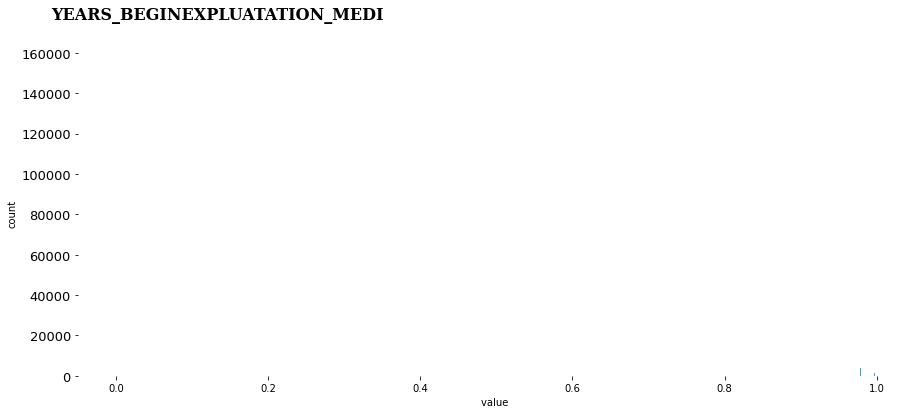

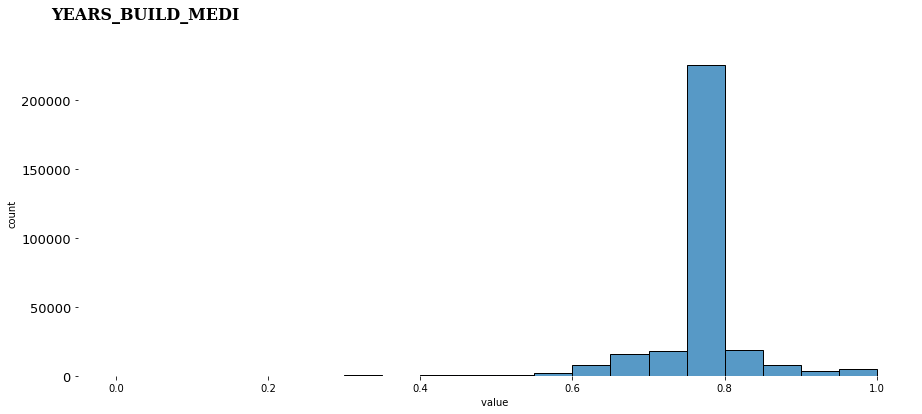

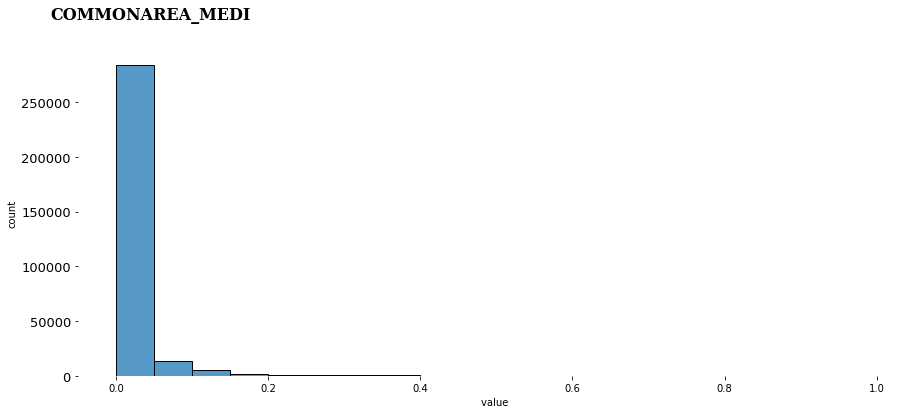

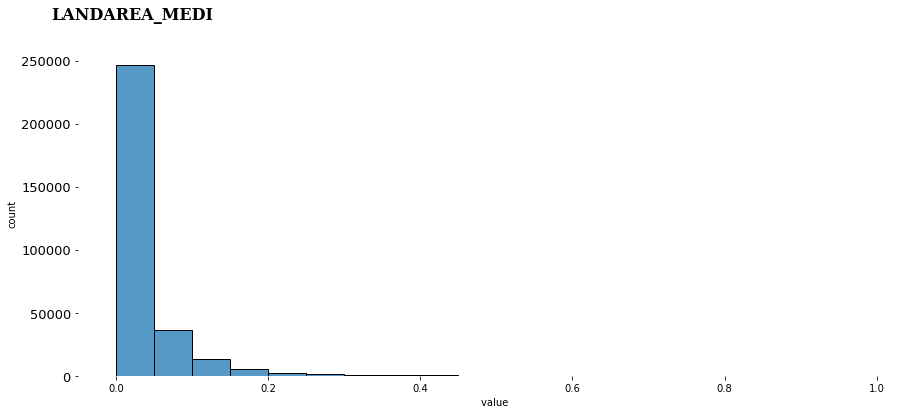

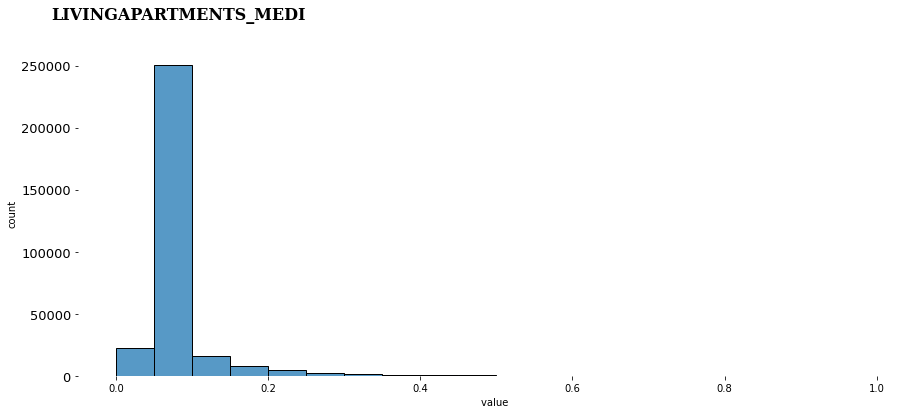

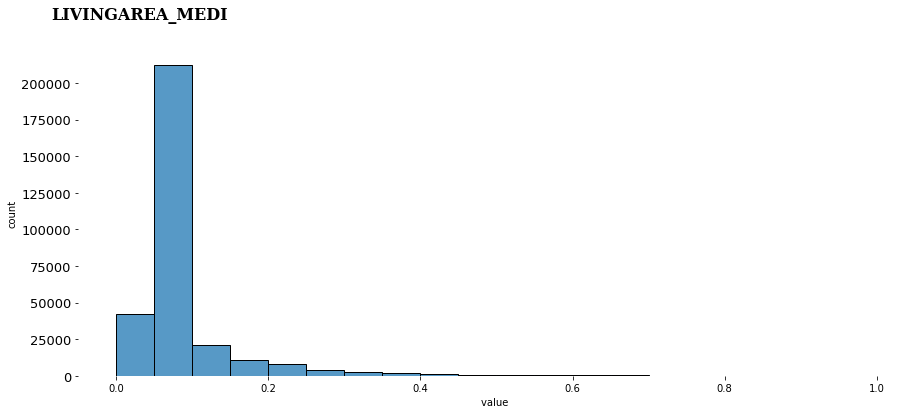

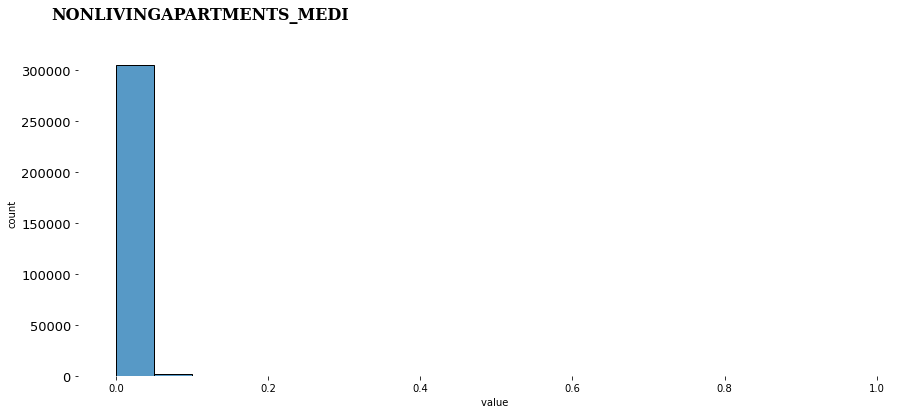

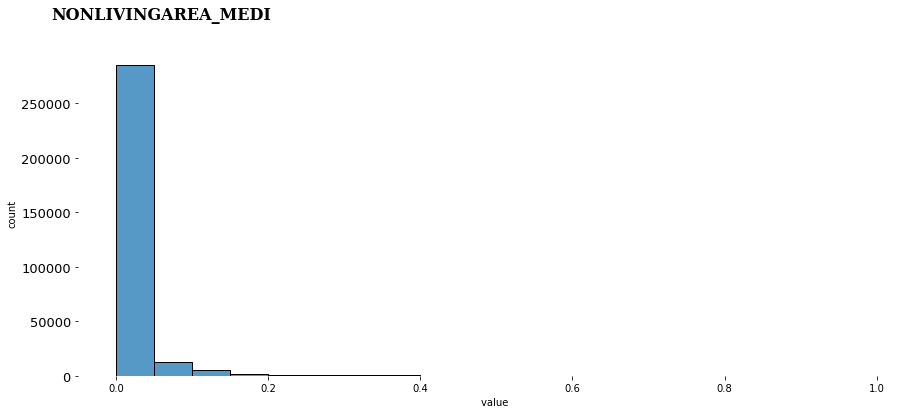

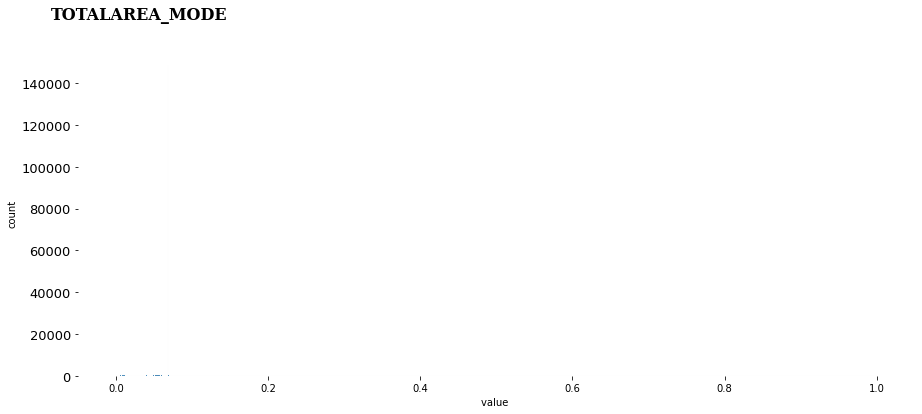

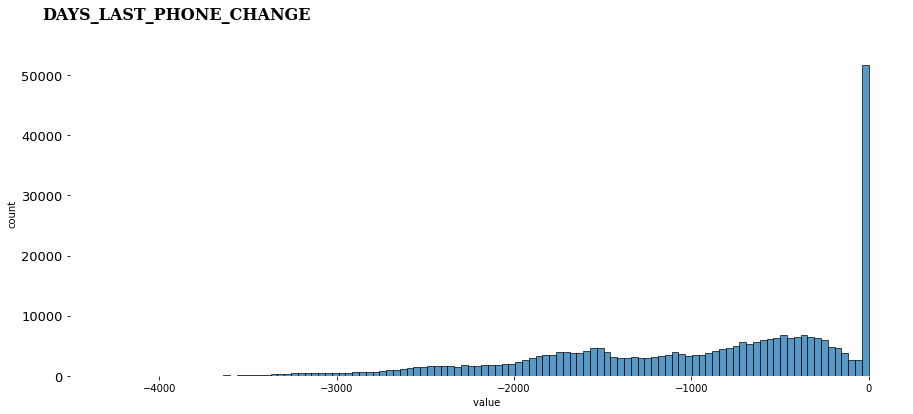

In [29]:
print("Histograms of dataset")
for h in l2:
  fig, ax = plt.subplots(1,1, figsize=(15, 6))
  sns.histplot(app_train[h], palette='Blues_r')
  fig.text(0.1, 0.95, f'{h}', fontsize=16, fontweight='bold', fontfamily='serif')
  plt.xlabel('value ', fontsize=10)
  plt.ylabel('count',fontsize=10)
  plt.yticks(fontsize=13)
  plt.box(False)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


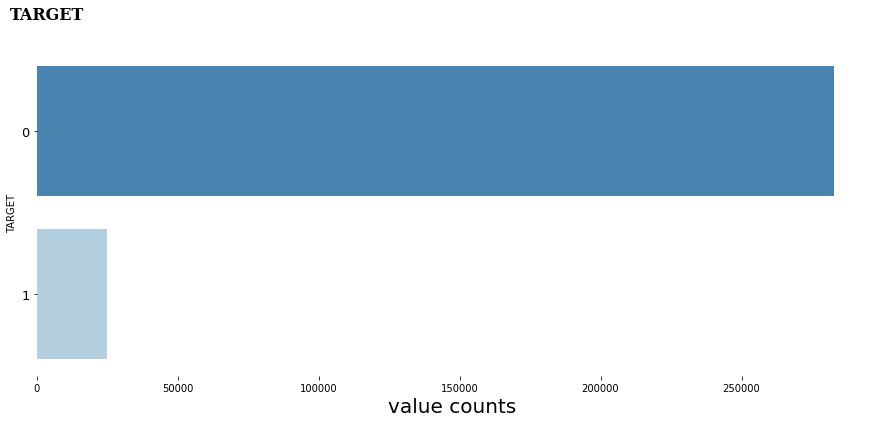

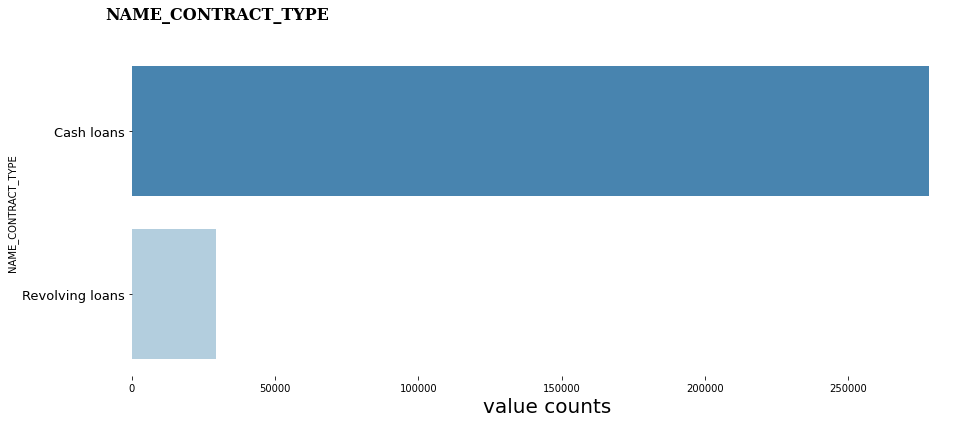

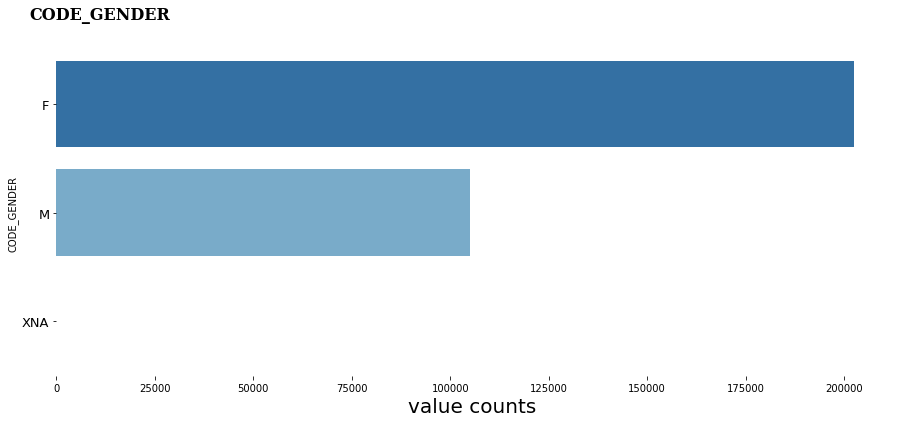

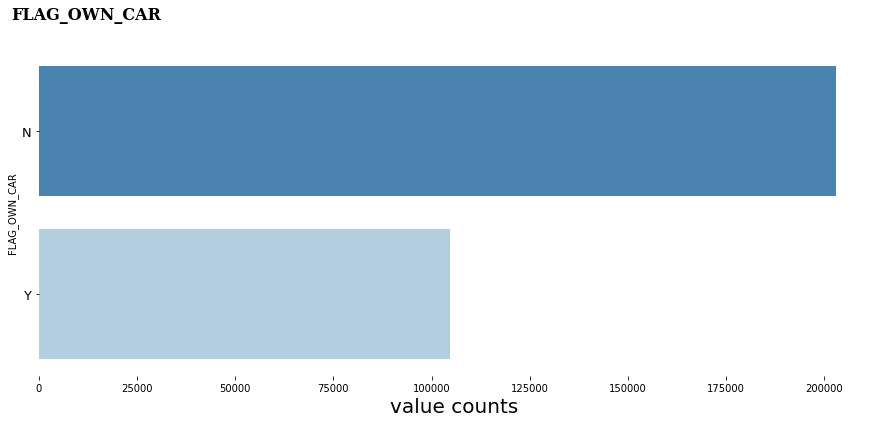

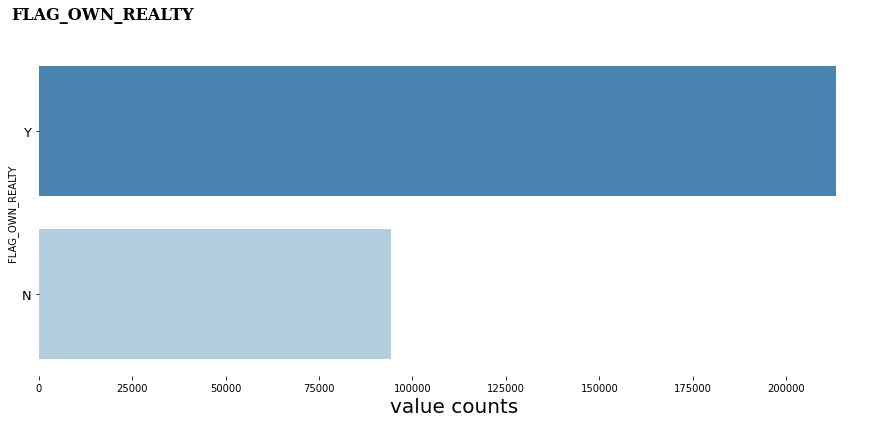

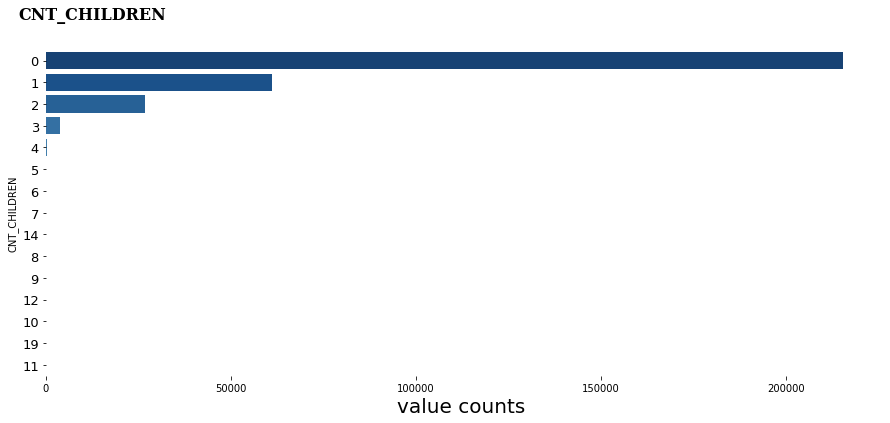

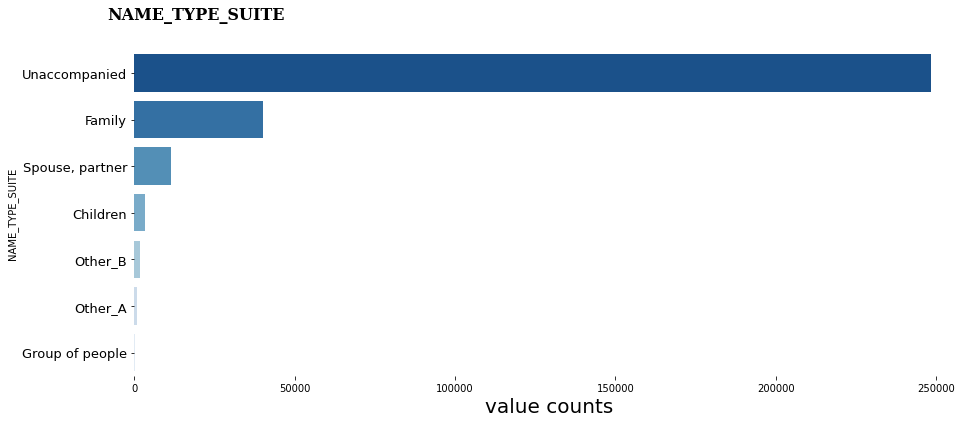

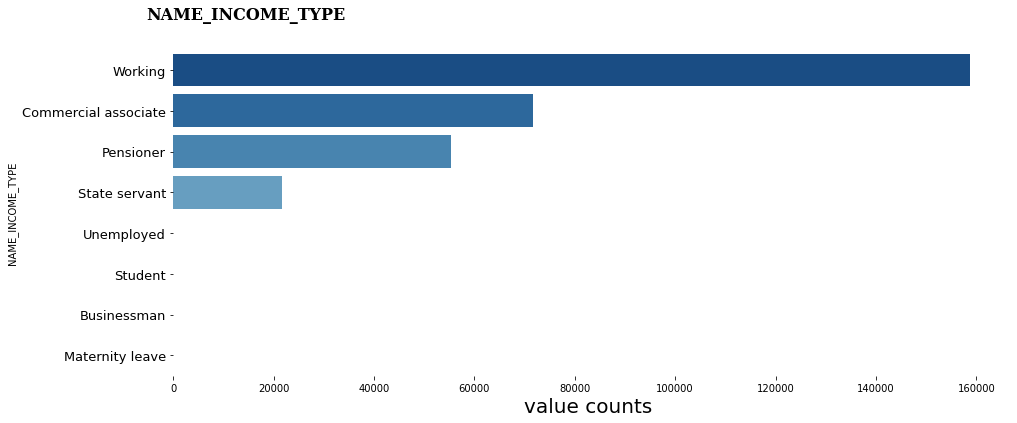

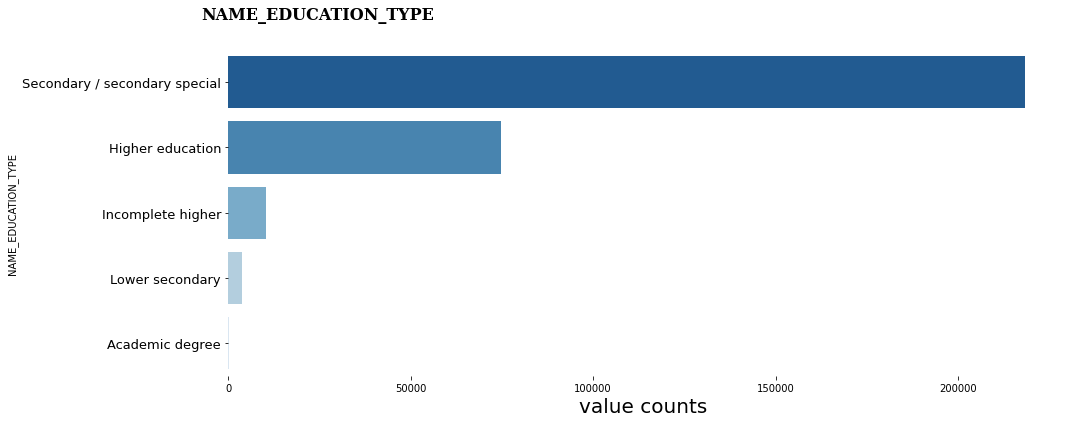

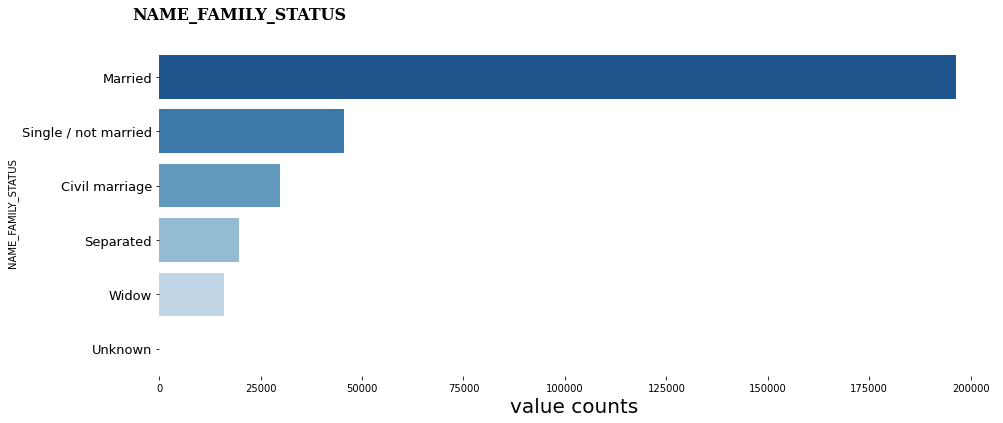

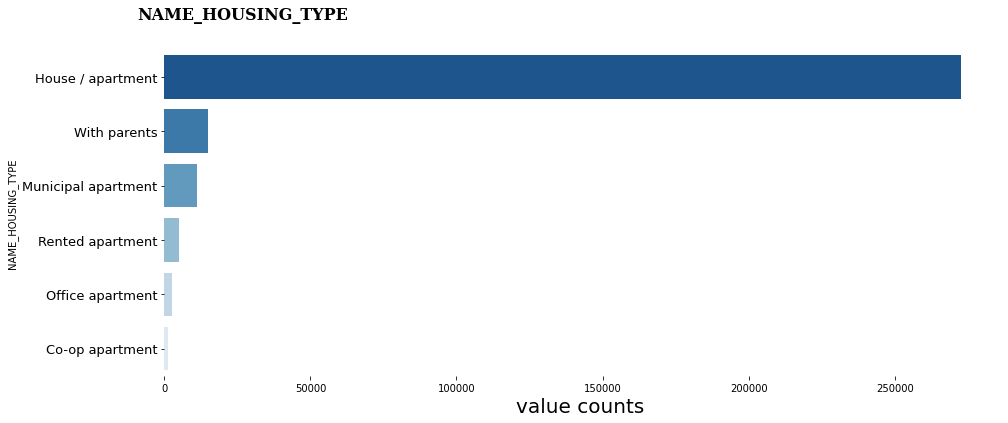

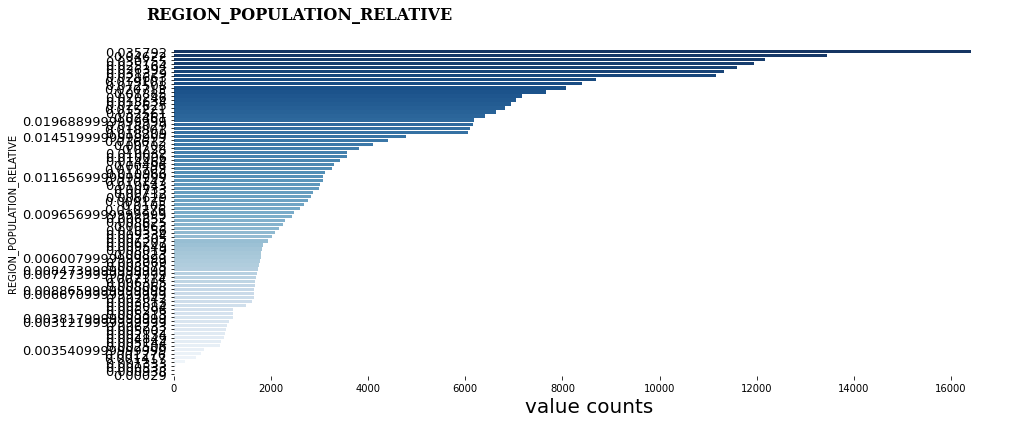

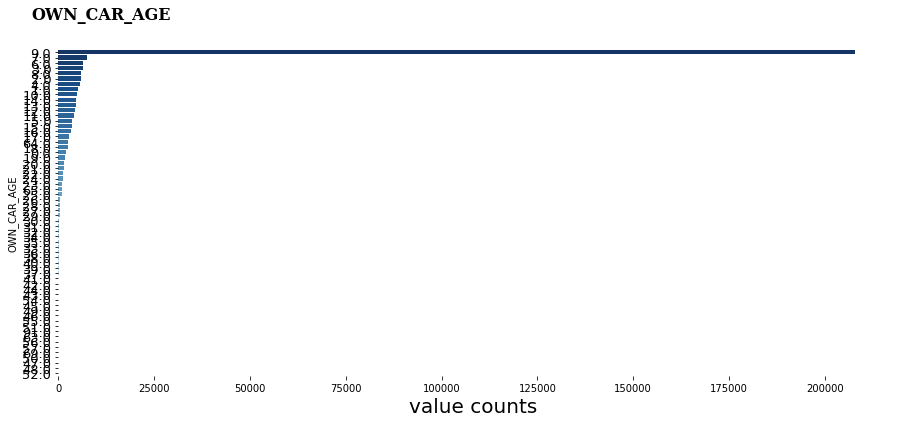

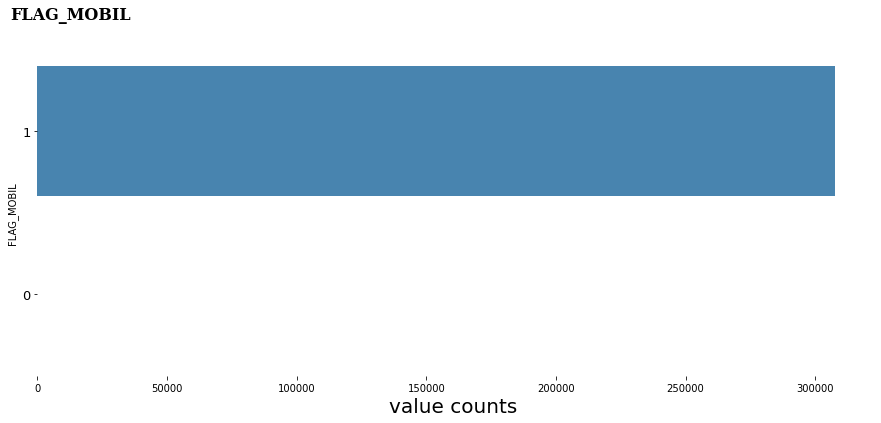

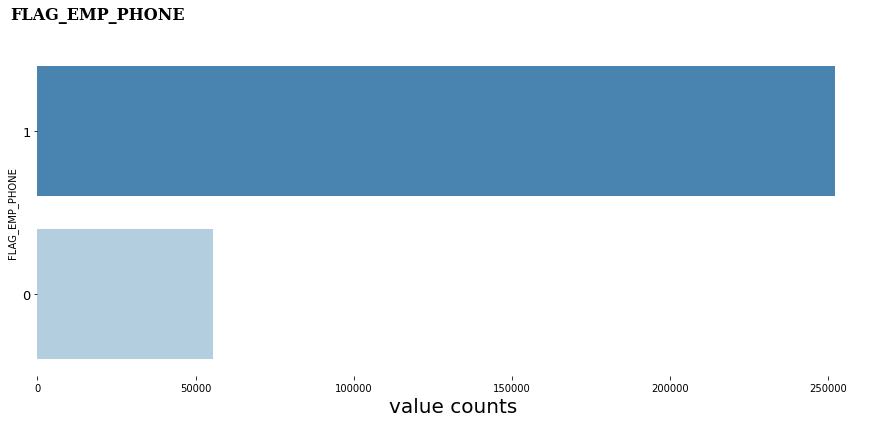

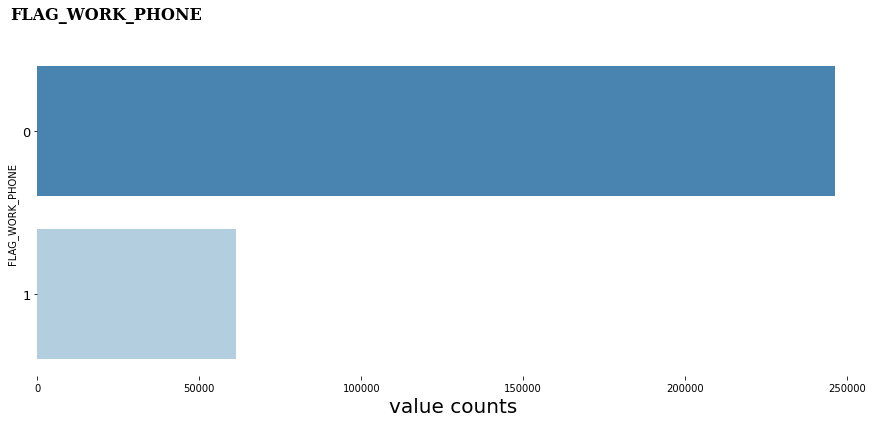

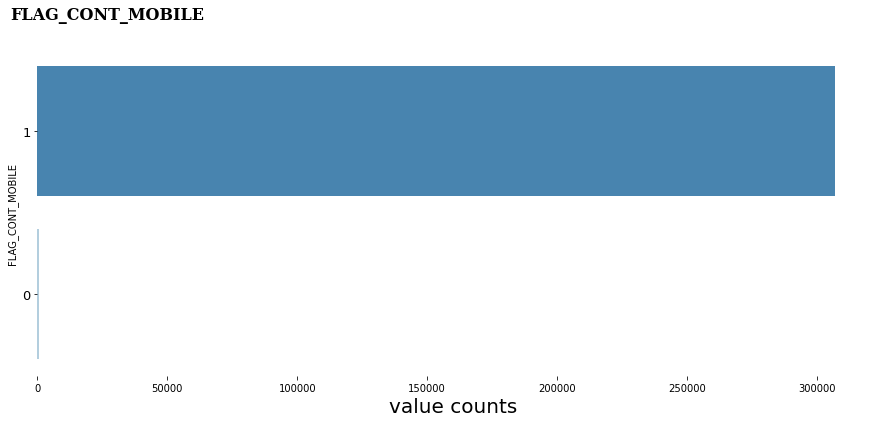

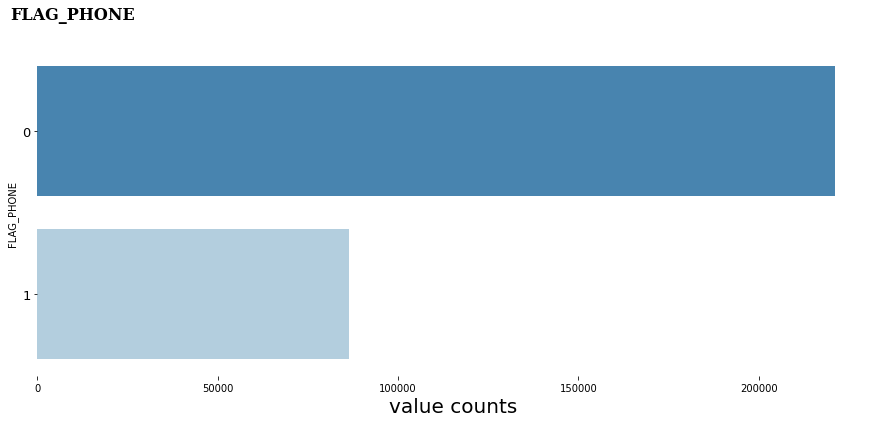

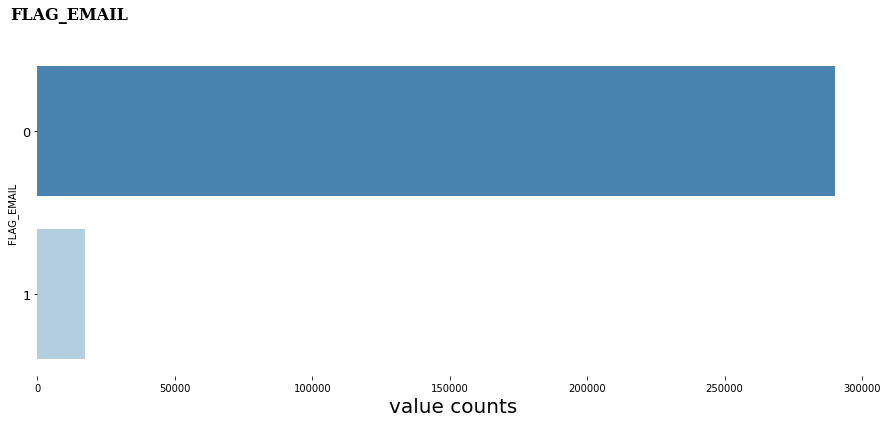

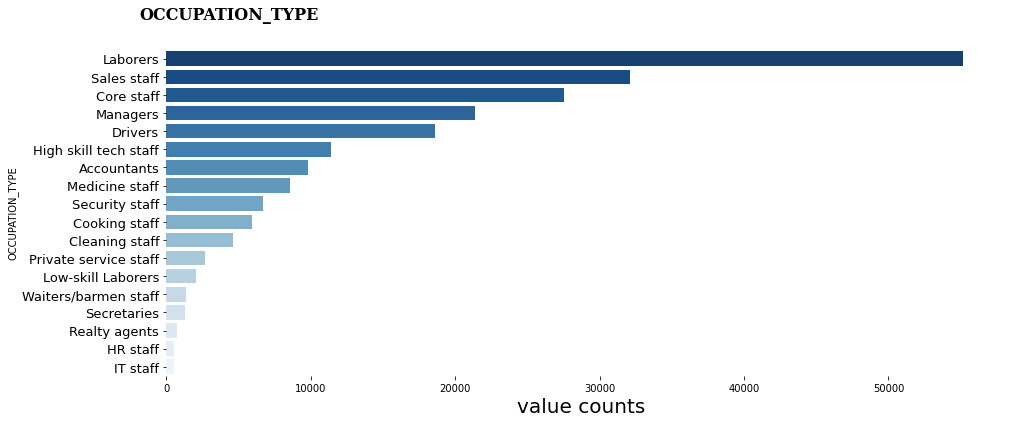

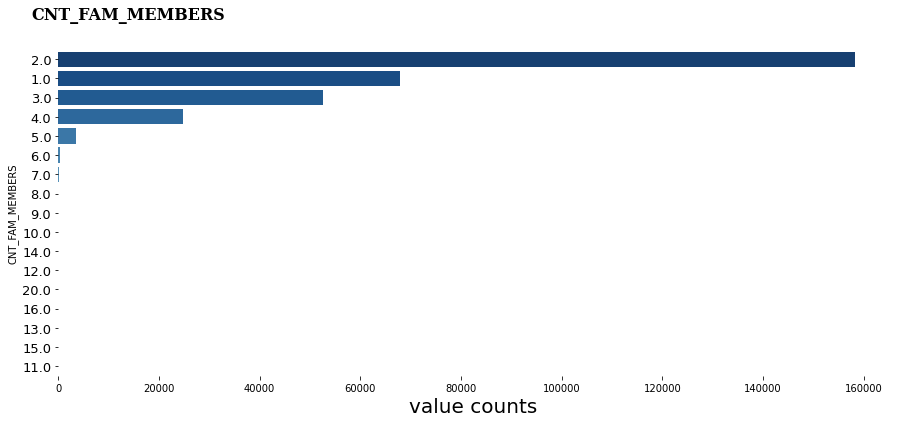

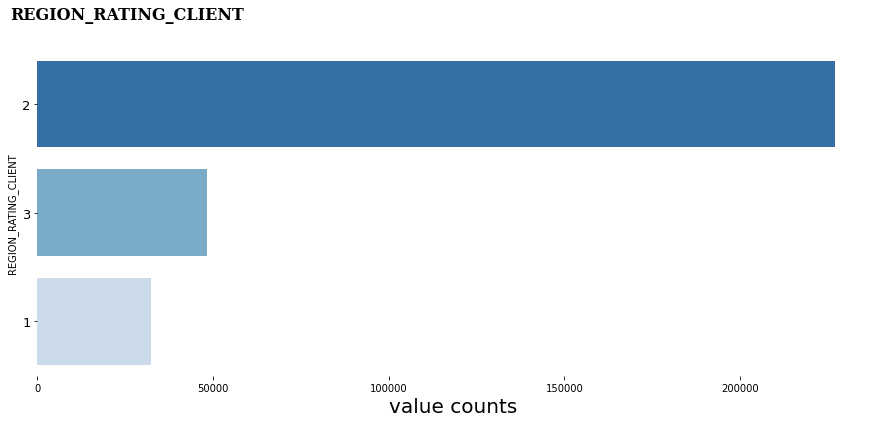

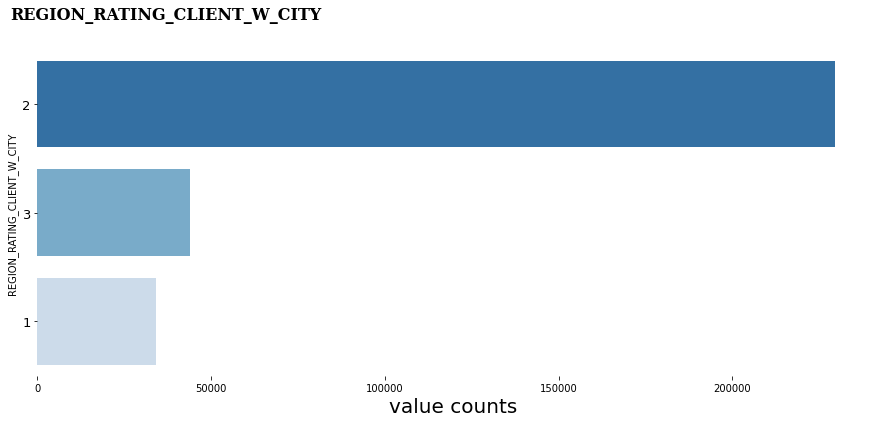

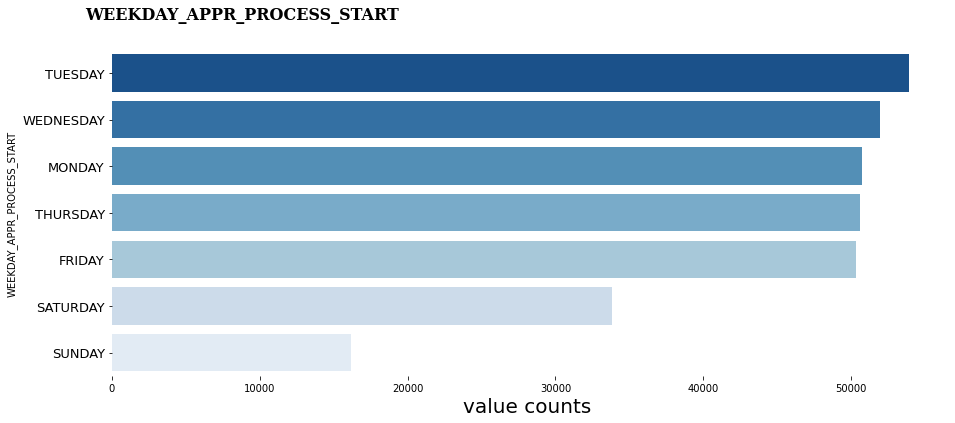

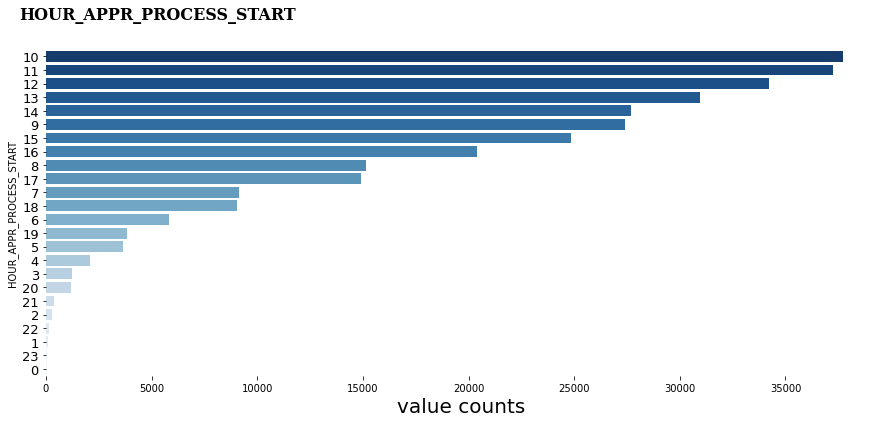

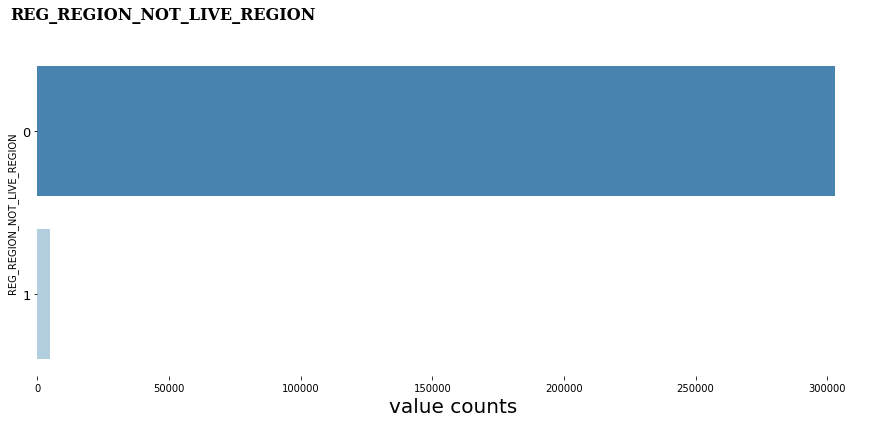

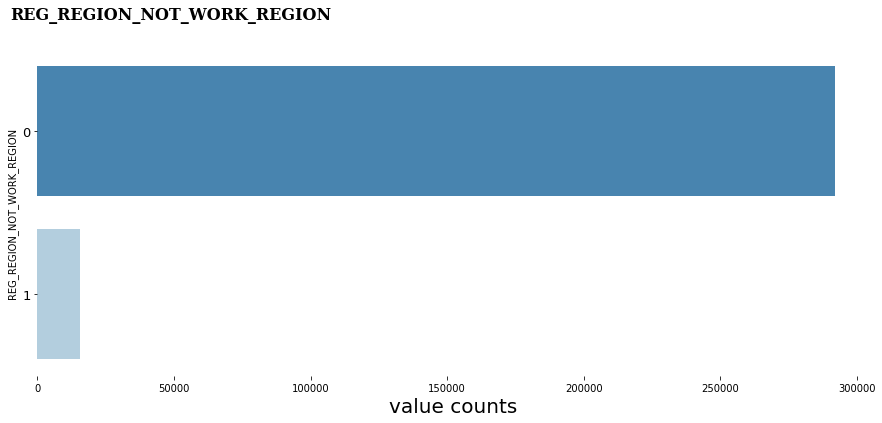

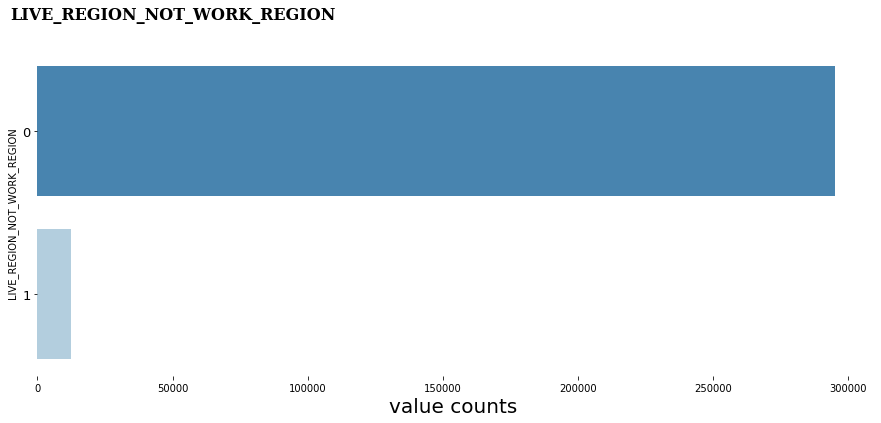

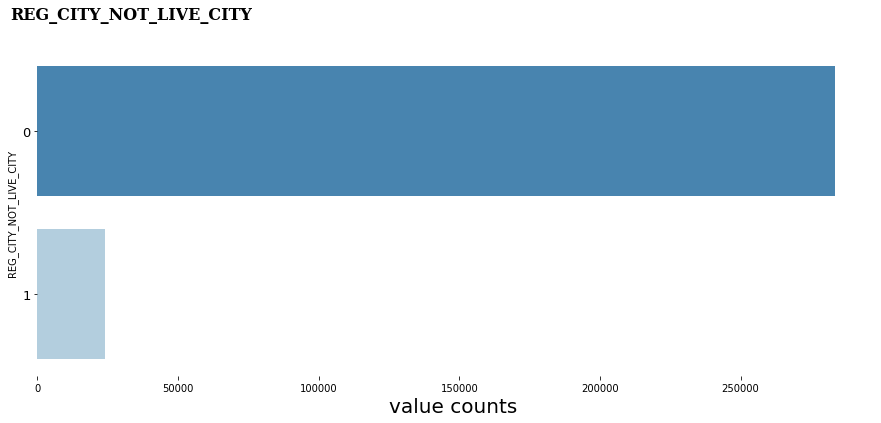

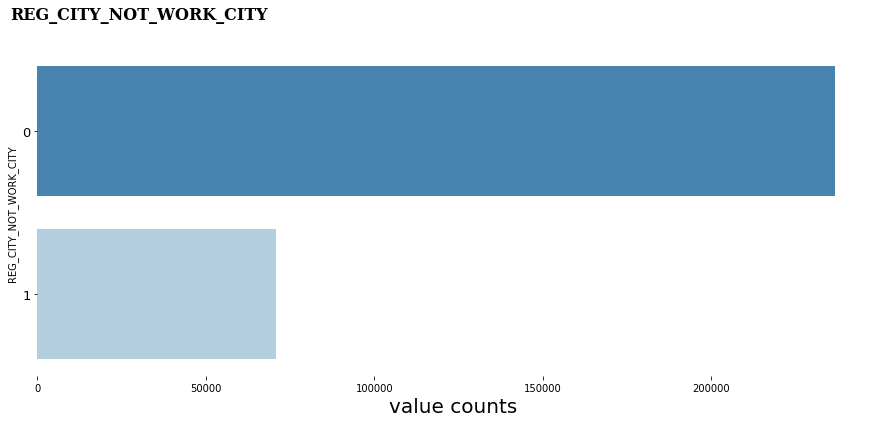

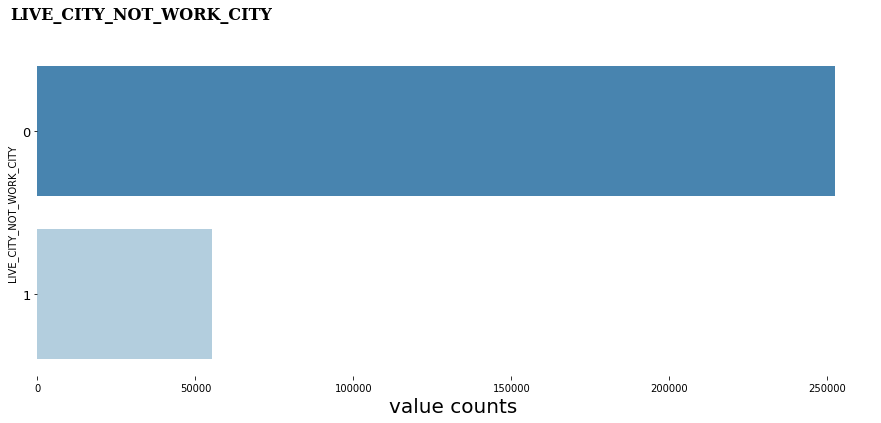

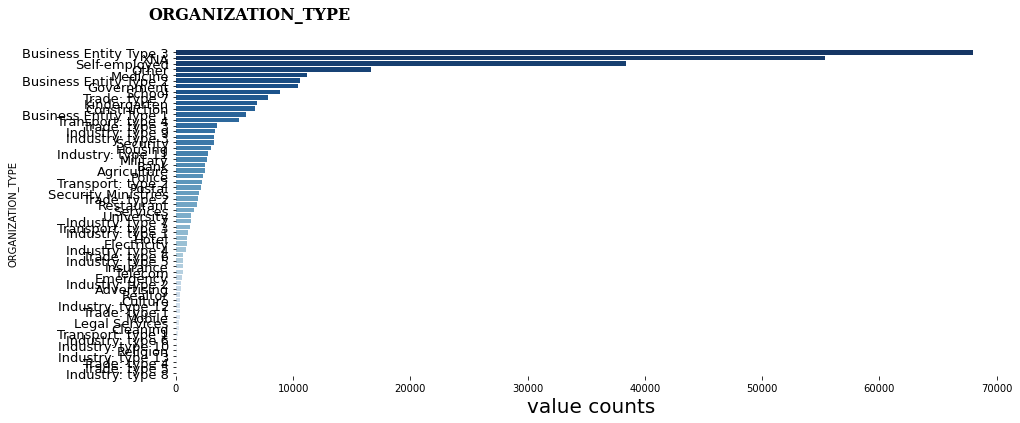

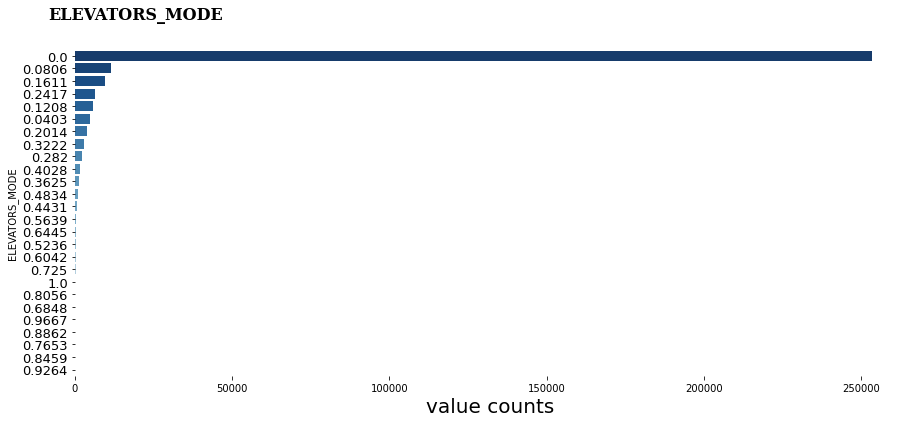

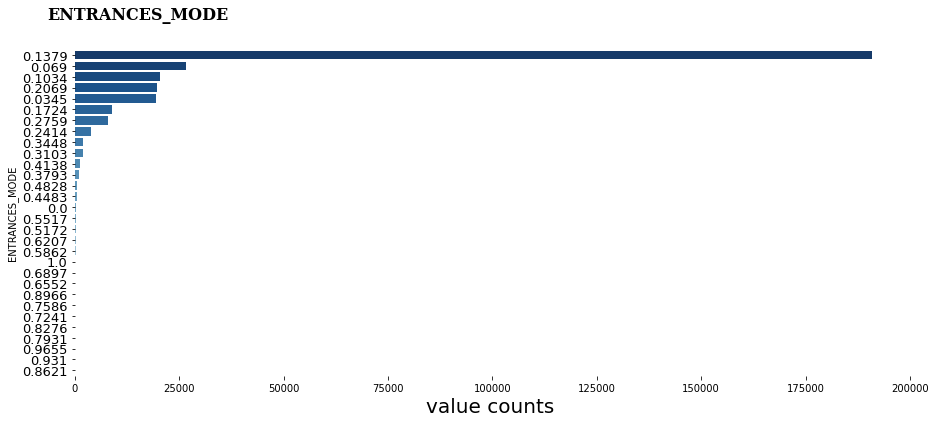

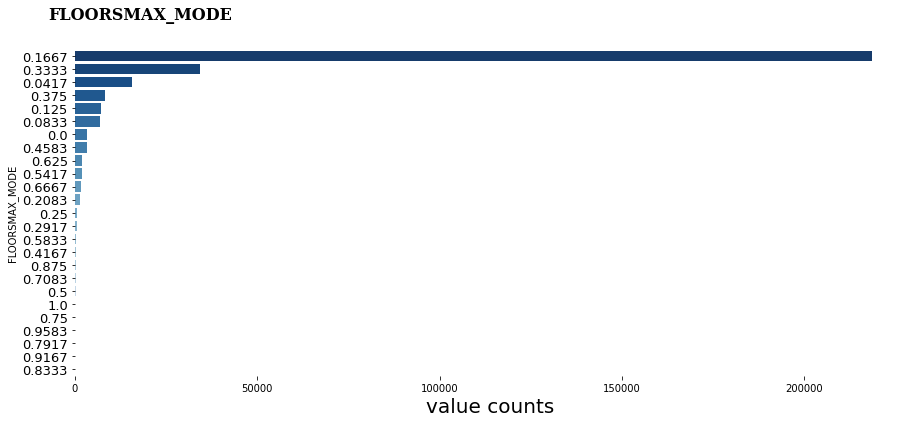

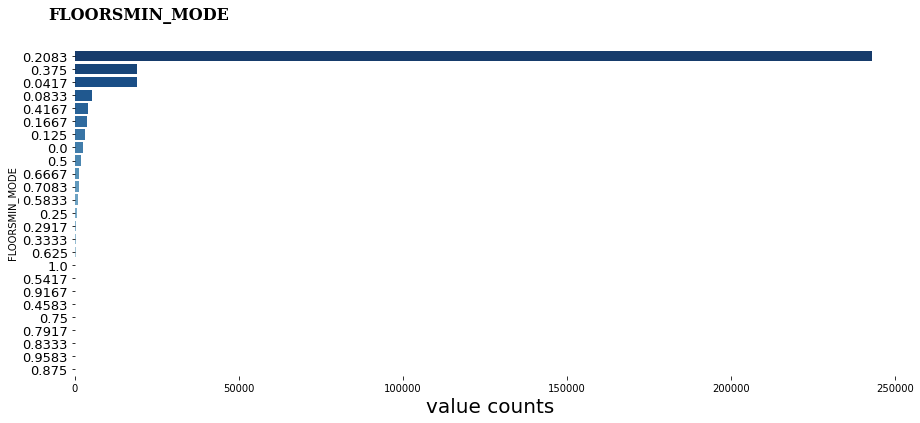

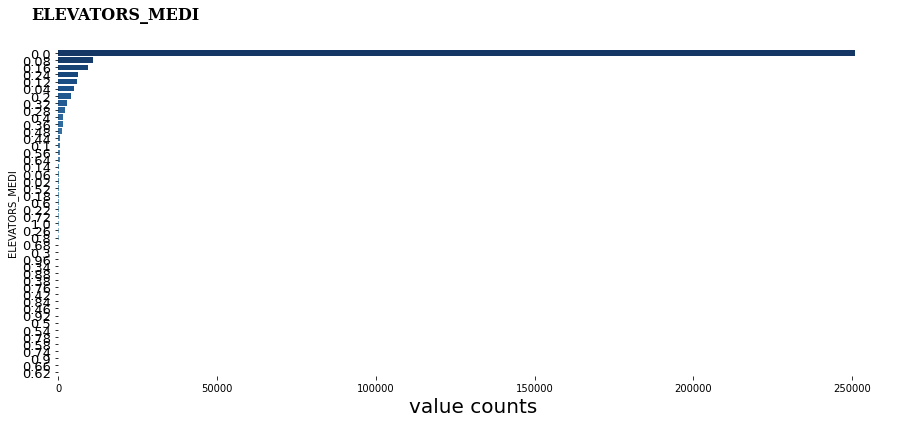

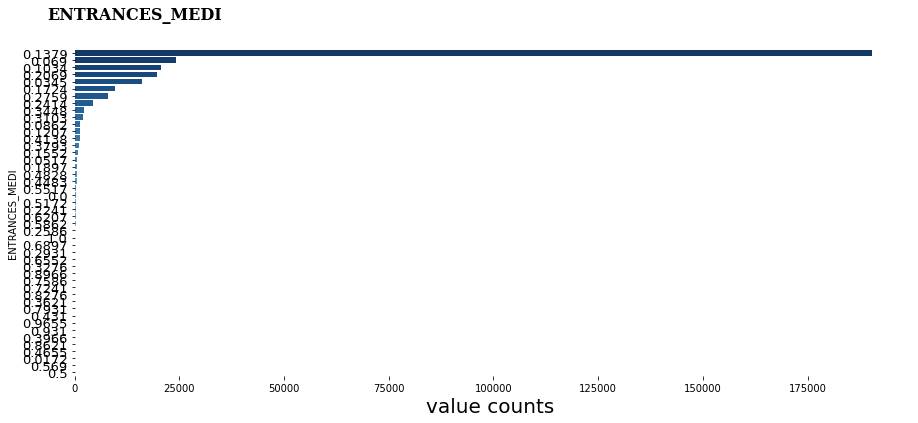

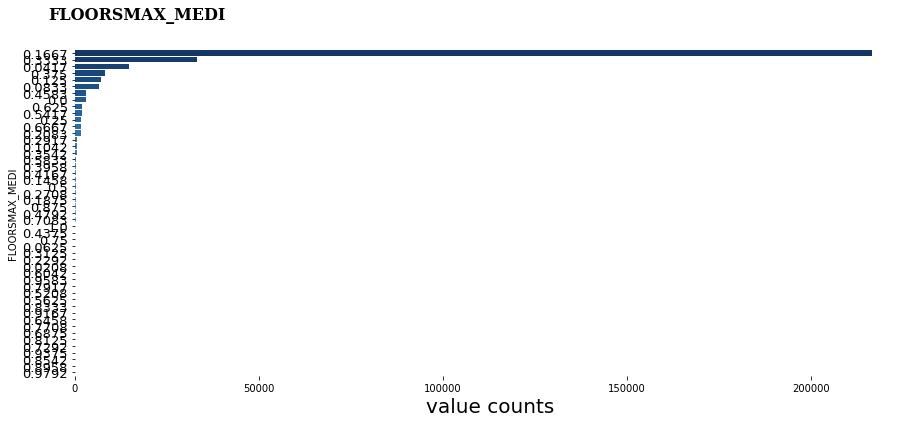

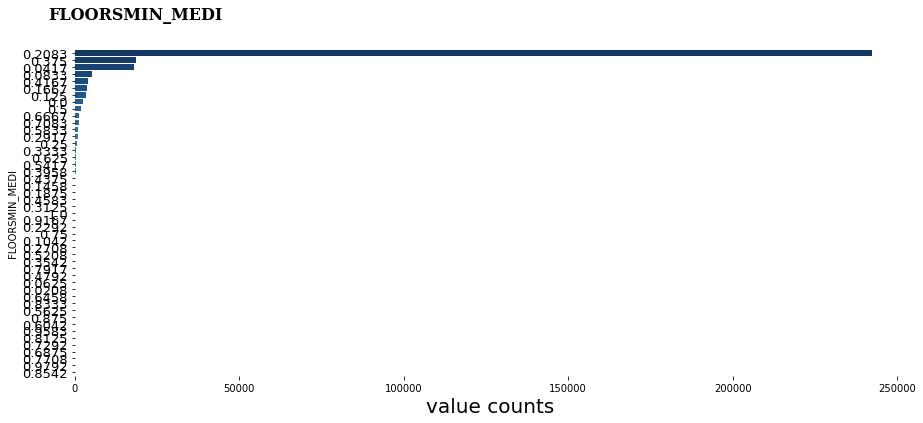

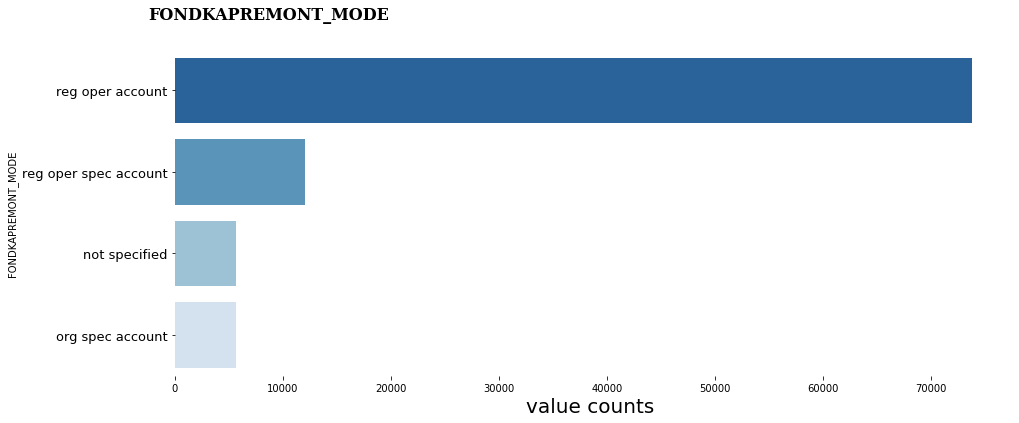

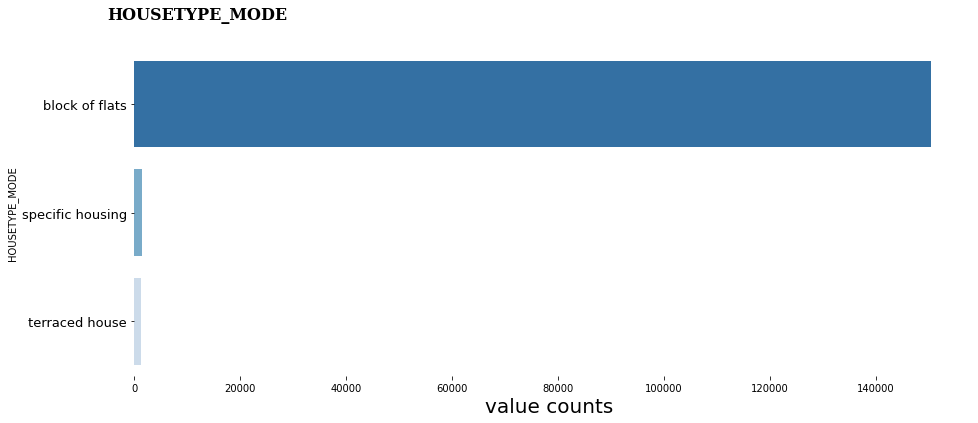

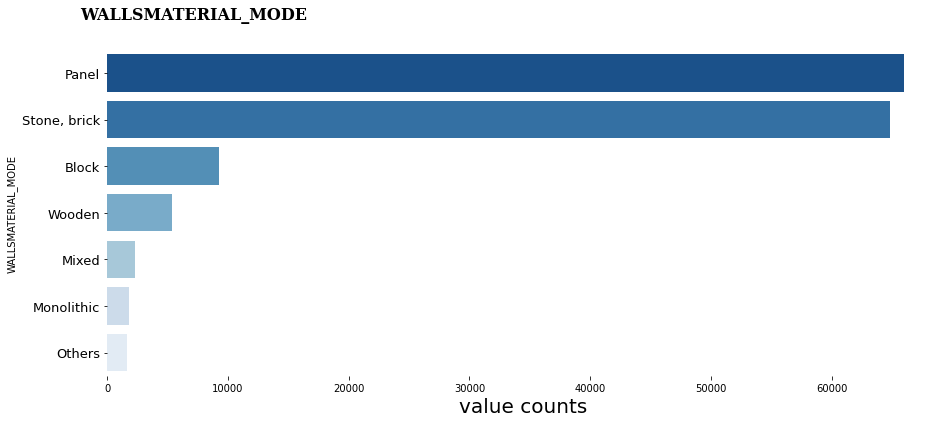

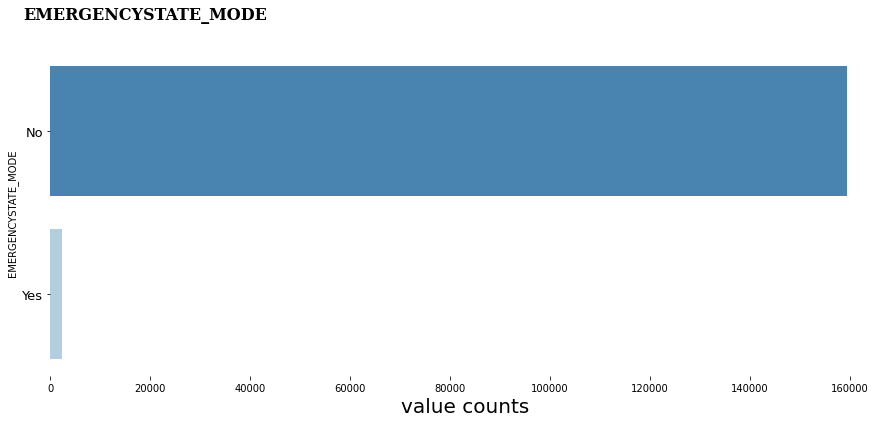

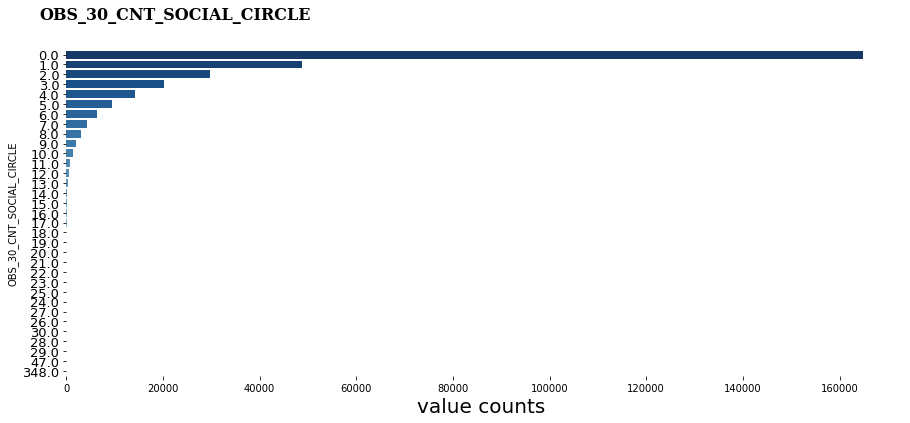

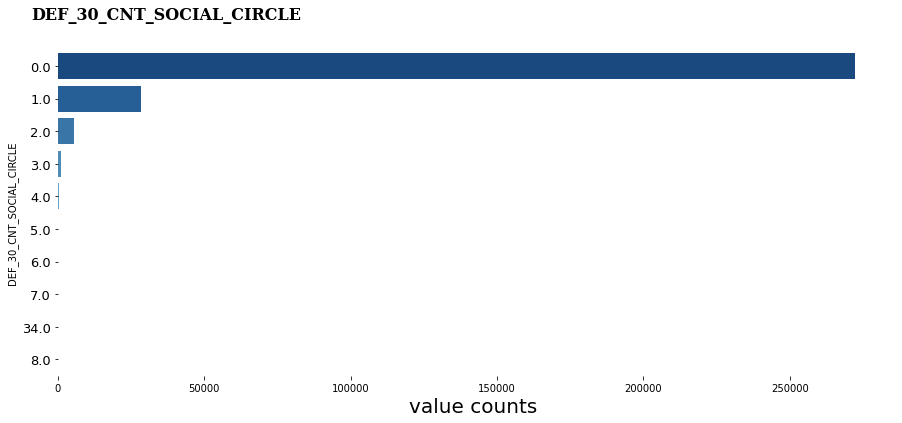

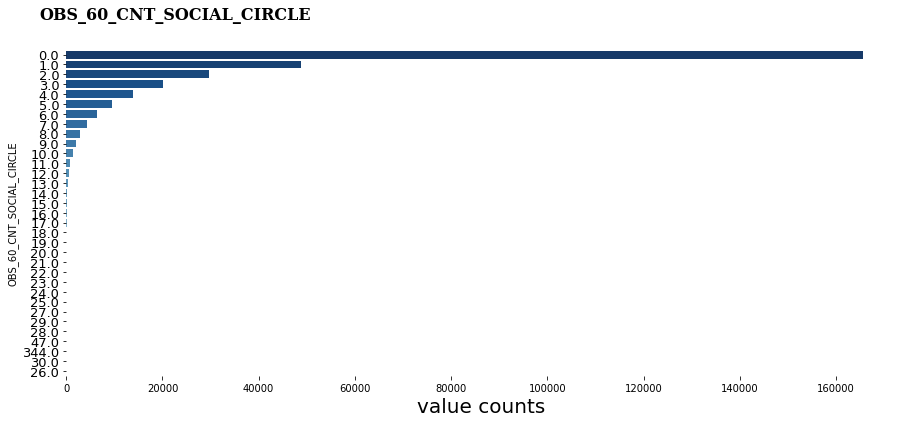

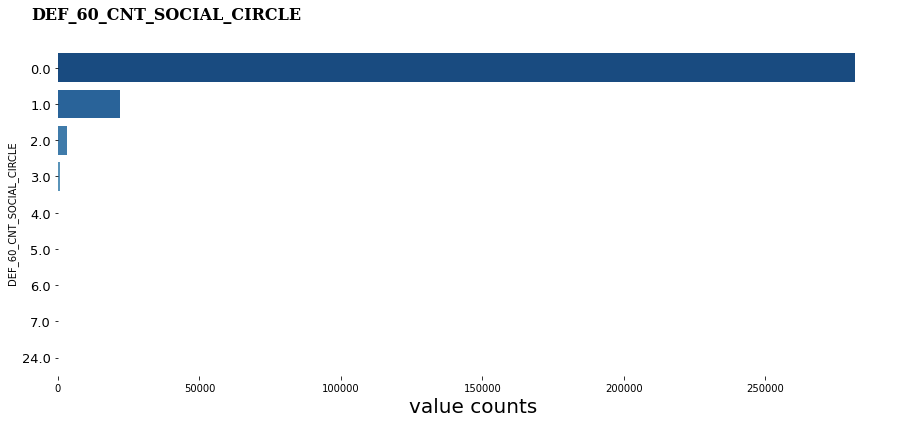

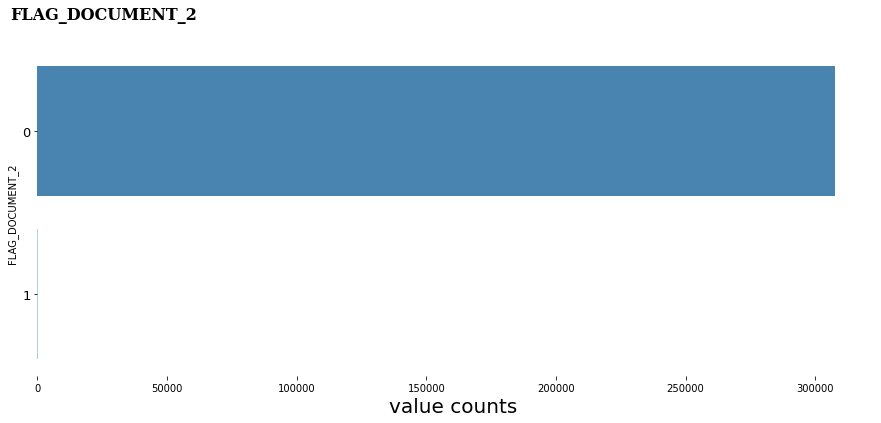

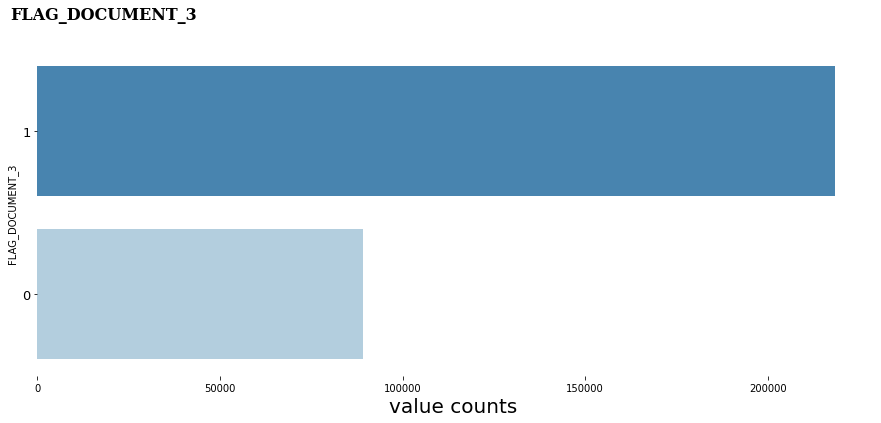

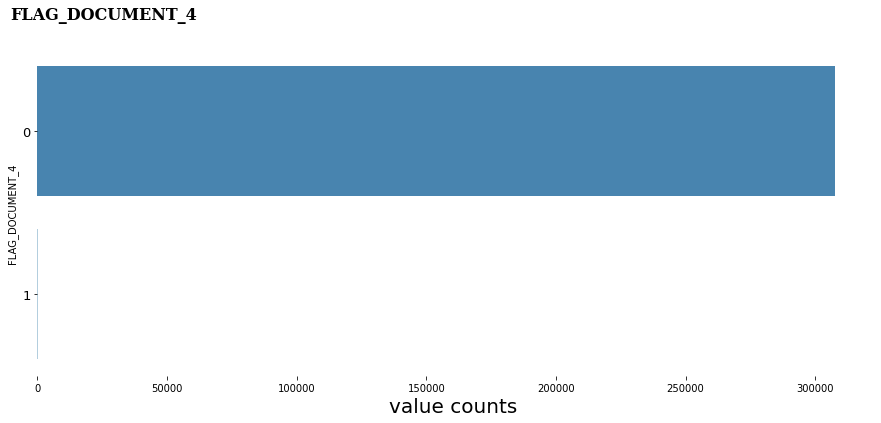

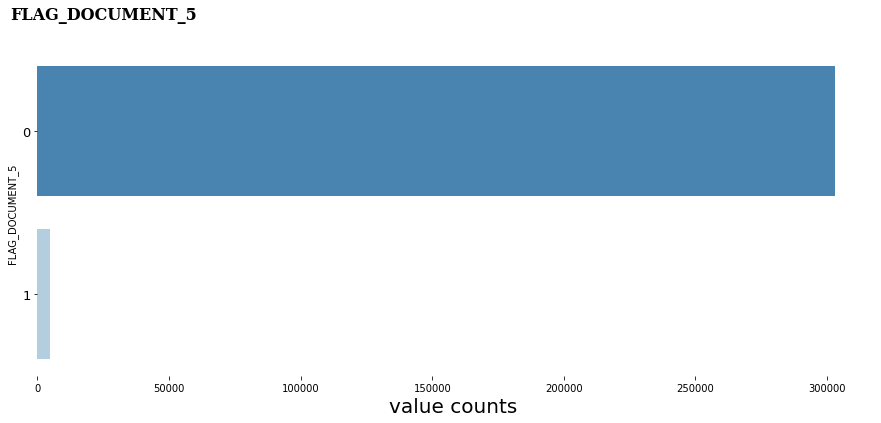

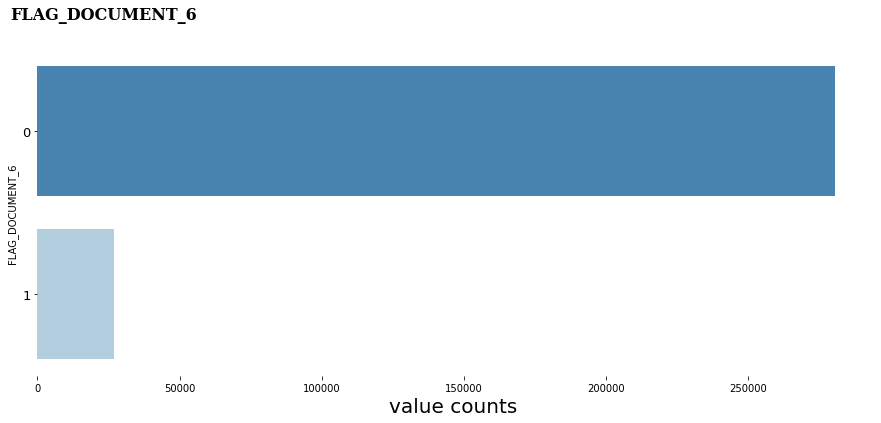

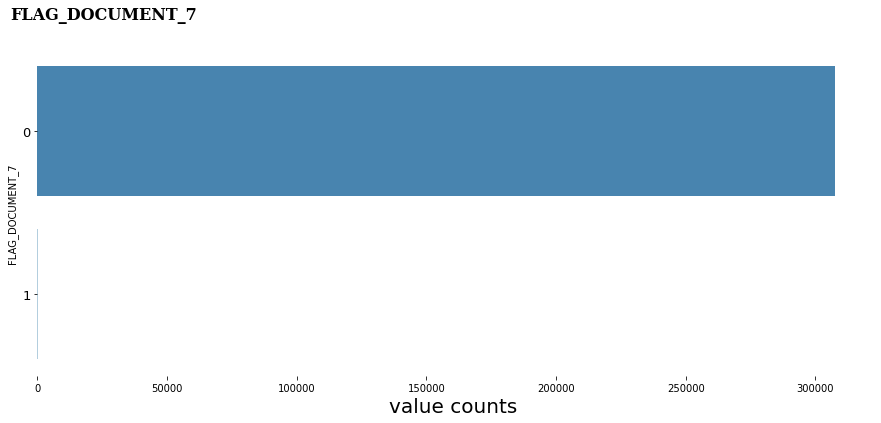

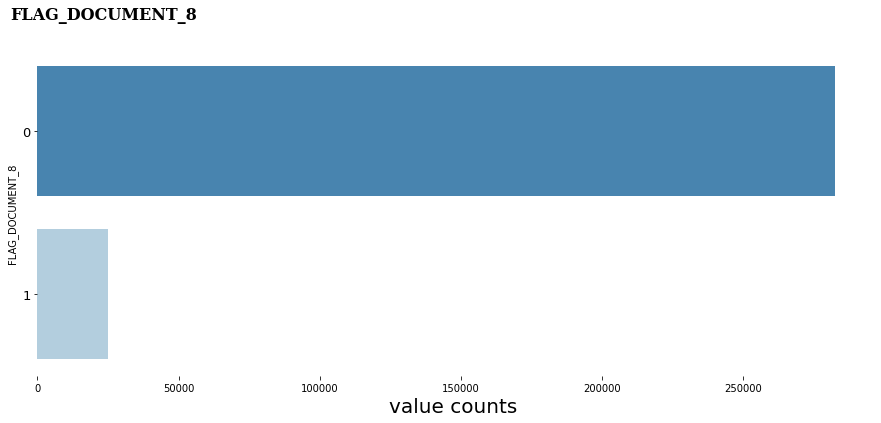

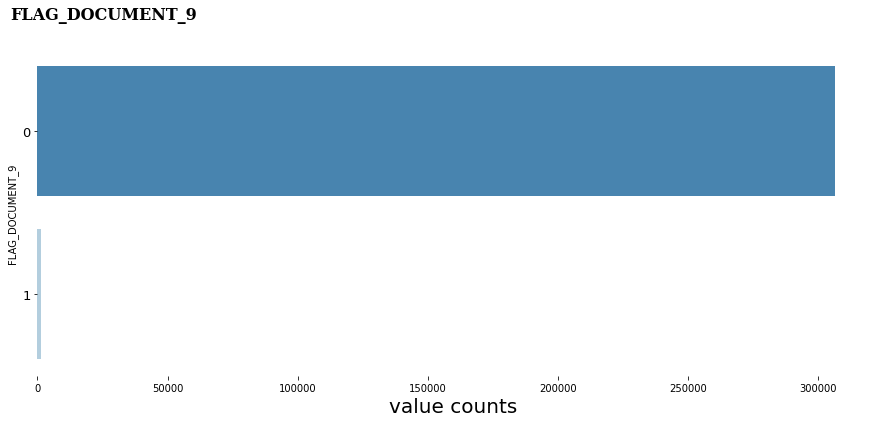

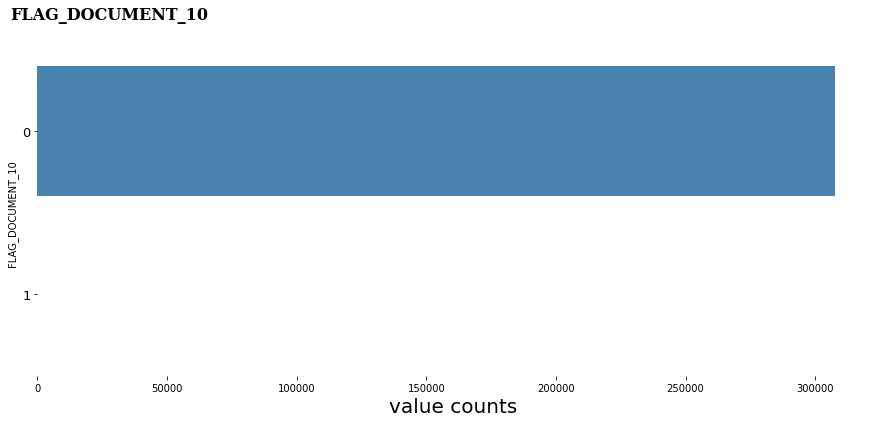

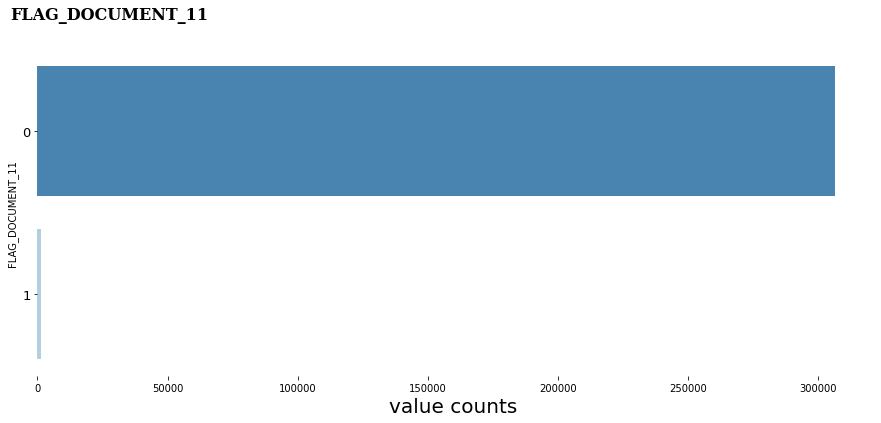

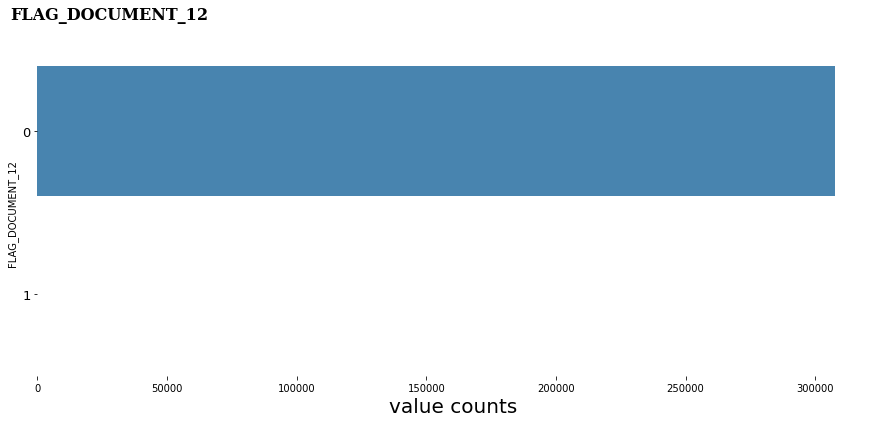

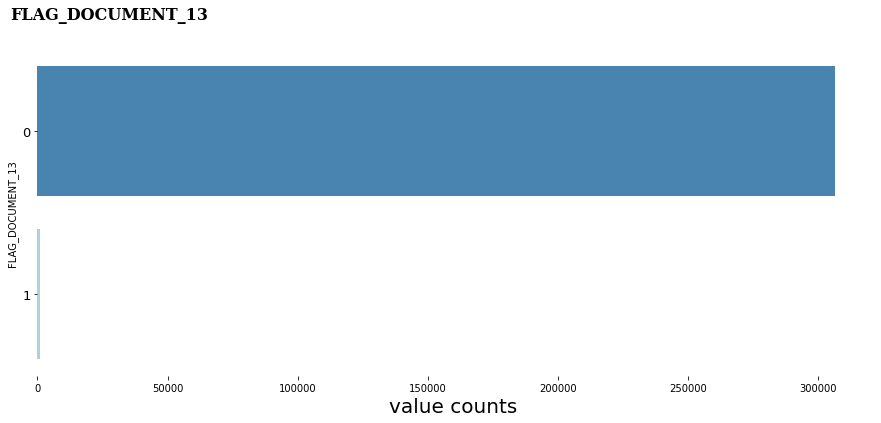

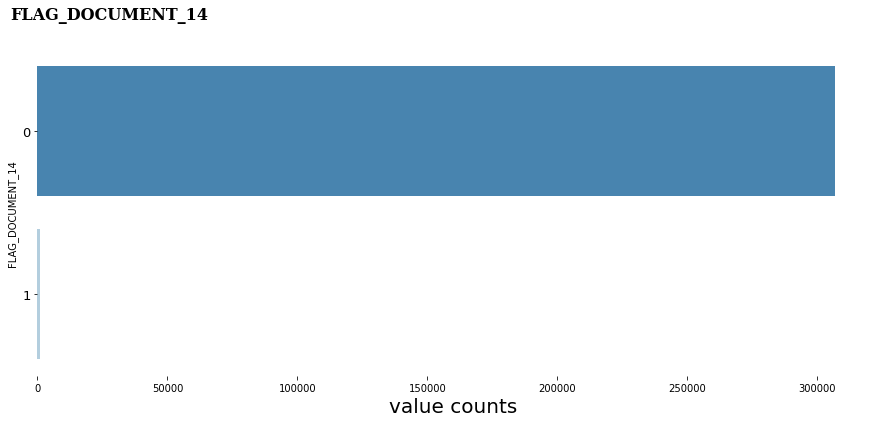

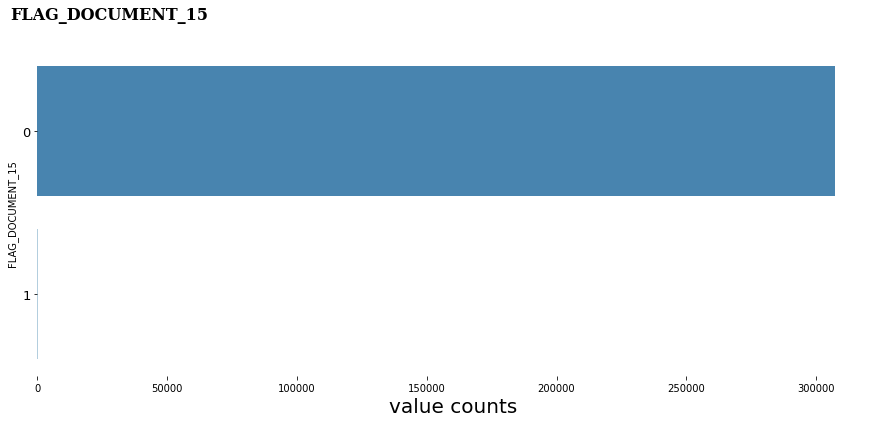

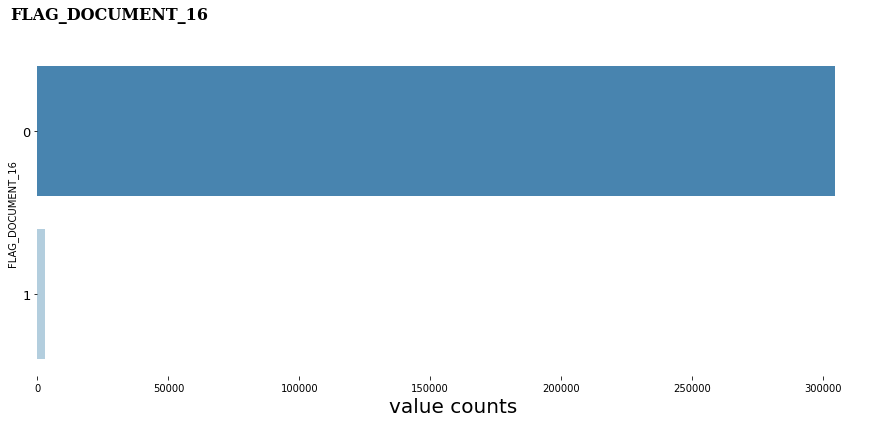

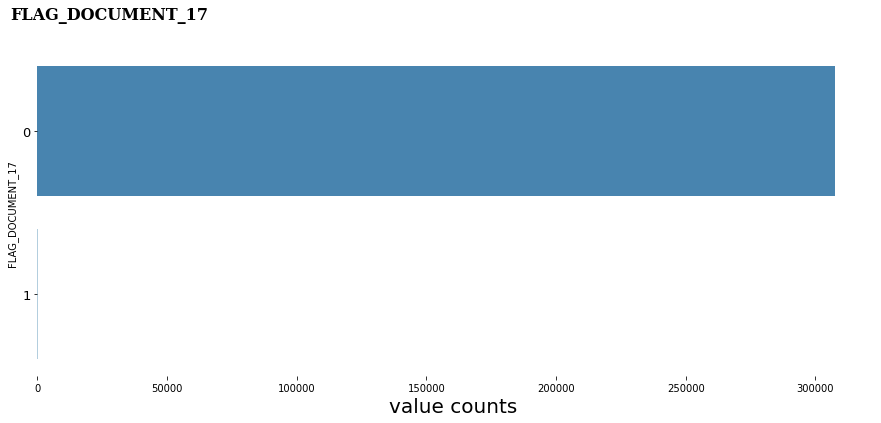

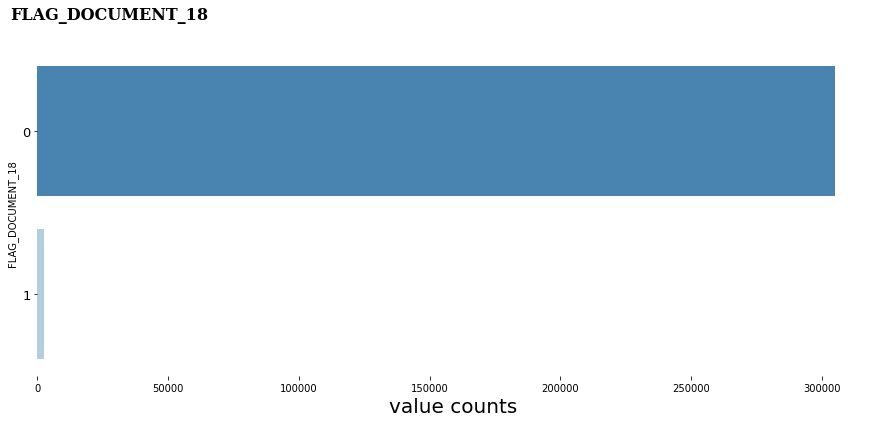

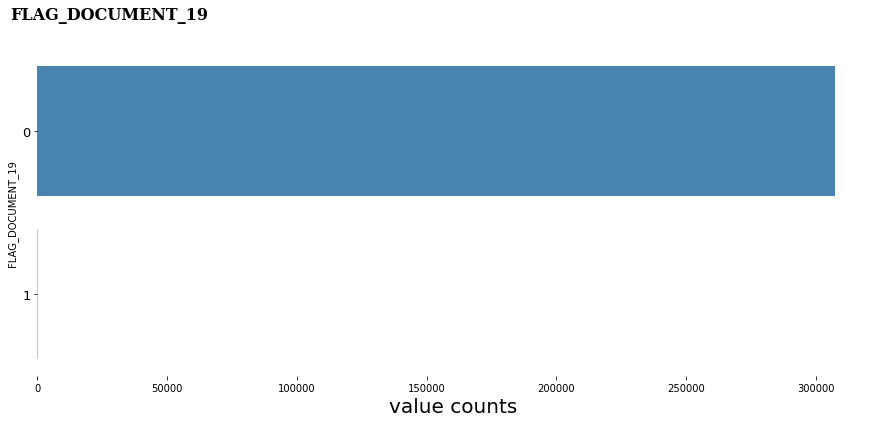

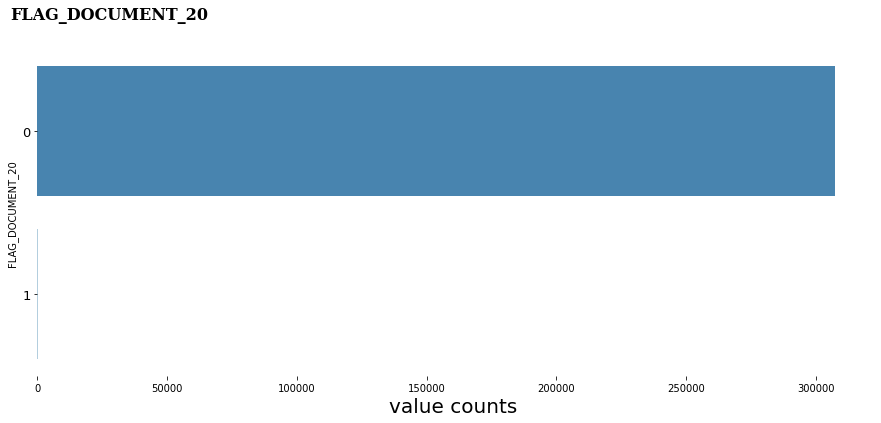

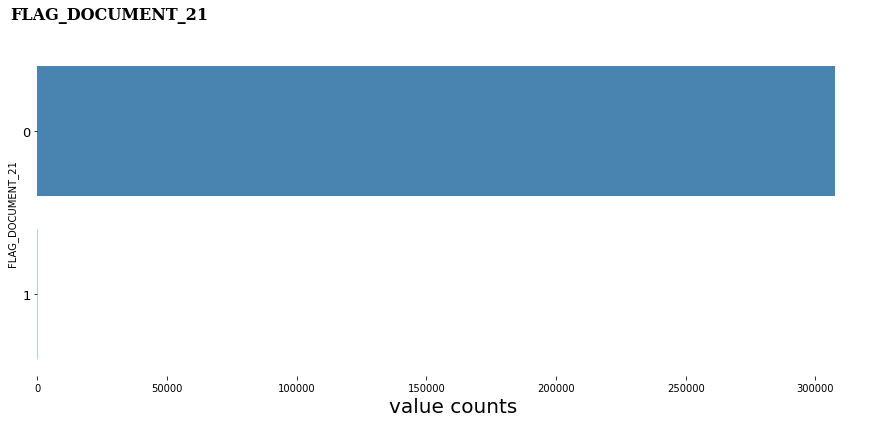

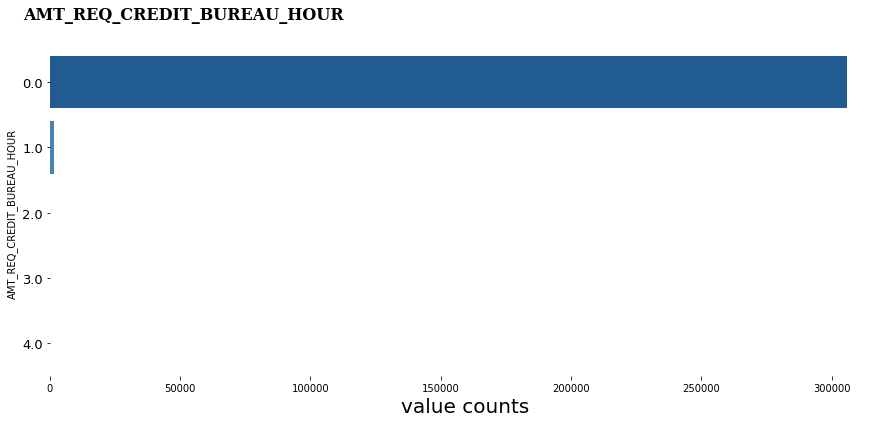

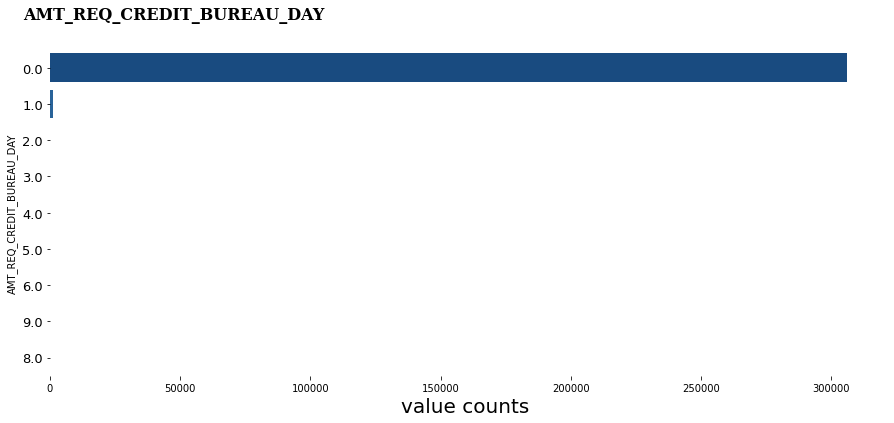

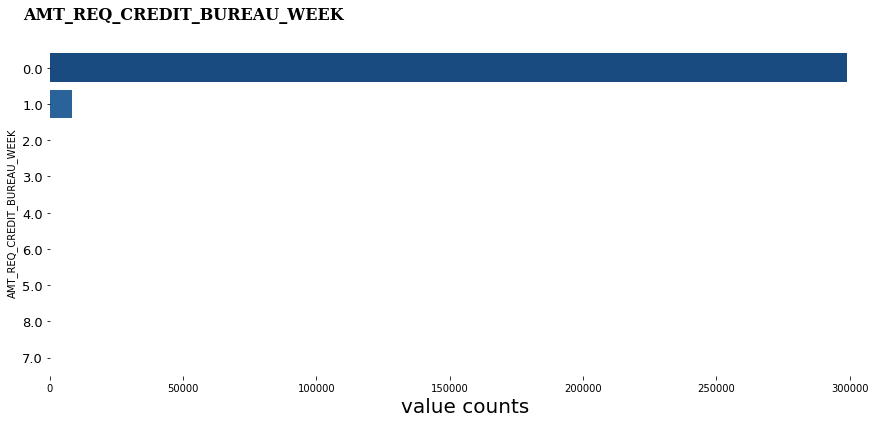

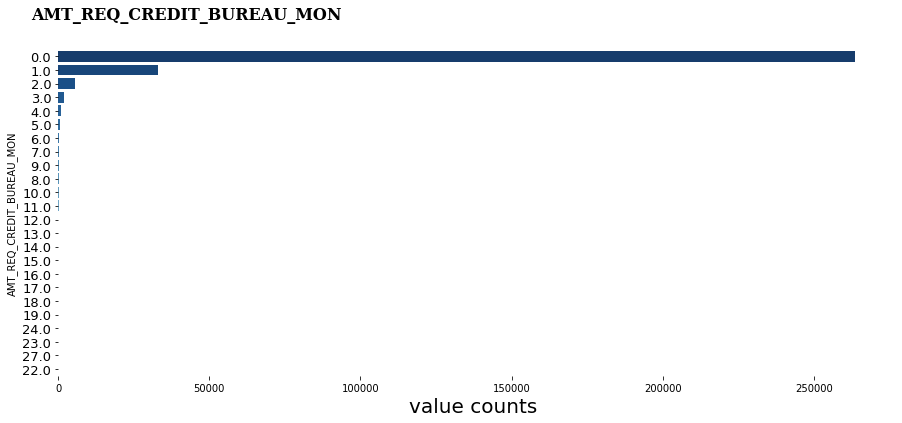

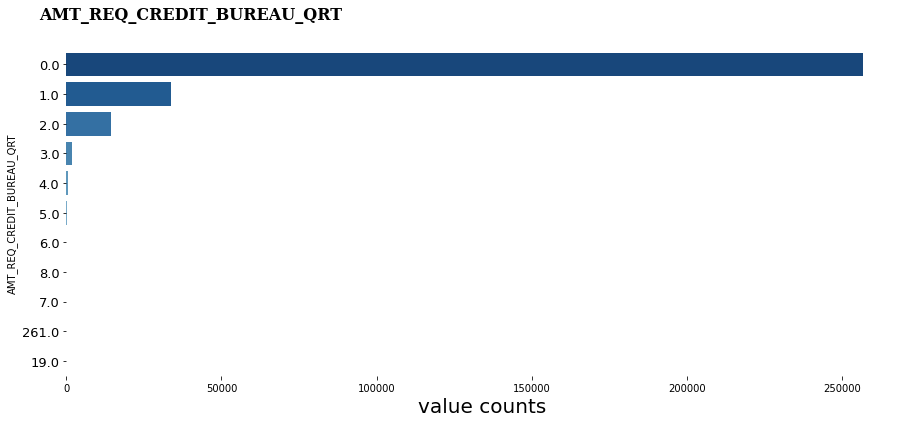

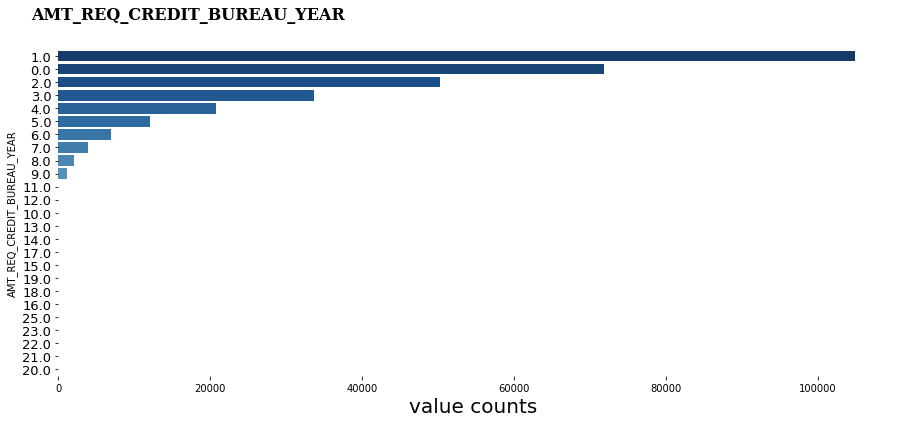

In [30]:
for i in l1:
  fig, ax = plt.subplots(1,1, figsize=(15, 6))
  sns.countplot(y = app_train[i][1:],data=app_train.iloc[1:], order=app_train[i][1:].value_counts().index, palette='Blues_r')
  fig.text(0.1, 0.95, f'{i}', fontsize=16, fontweight='bold', fontfamily='serif')
  plt.xlabel('value counts ', fontsize=20)
  plt.ylabel(f'{i}')
  plt.yticks(fontsize=13)
  plt.box(False)

> # <font color='green'>**Modeling**</font>


In [31]:
l = LabelEncoder()
for q in app_test.describe(include='object').columns:
    app_test[q]=l.fit_transform(app_test[q])
app_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,0,0,1,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,0,0,0,0,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
48741,456223,0,0,1,1,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,0,1,0,0,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [32]:

l = LabelEncoder()
for p in app_train.describe(include='object').columns:
    app_train[p]=l.fit_transform(app_train[p])
app_train


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307507,456252,0,0,0,0,1,0,72000.0,269550.0,12001.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307508,456253,0,0,0,0,1,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,0,0,0,1,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:

x=app_train.drop(['TARGET','SK_ID_CURR'],axis=1)

print(x)
y=app_train['TARGET']
print(y)

        NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                        0            1             0                1   
1                        0            0             0                0   
2                        1            1             1                1   
3                        0            0             0                1   
4                        0            1             0                1   
...                    ...          ...           ...              ...   
307506                   0            1             0                0   
307507                   0            0             0                1   
307508                   0            0             0                1   
307509                   0            0             0                1   
307510                   0            0             0                0   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0          202500.0    40

In [34]:
x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size=.30,random_state=1)


In [35]:
x_test=app_test.drop(['SK_ID_CURR'],axis=1)

>  <font color='blue'>**Linear Regression model**</font>


In [36]:
lr = LogisticRegression(max_iter=3000)
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_valid)

lr_train_score = lr.score(x_train, y_train)
lr_test_score= lr.score(x_valid, y_valid)


lr_acc = accuracy_score(y_pred_lr,y_valid)

pred_lr=lr.predict(x_test)
print(pred_lr)
print('LogisticRegressionModel Train Score is : ' , lr_train_score)
print('LogisticRegressionModel Test Score is : ' , lr_test_score)
print('LogisticRegressionModel accuracy is : ', lr_acc)


[0 0 0 ... 0 0 0]
LogisticRegressionModel Train Score is :  0.9193522161880915
LogisticRegressionModel Test Score is :  0.9190495805059943
LogisticRegressionModel accuracy is :  0.9190495805059943


>  <font color='blue'>**Decision tree model**</font>


In [37]:
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_valid)

dt_train_score = dt.score(x_train, y_train)
dt_test_score= dt.score(x_valid, y_valid)


dt_acc = accuracy_score(y_pred_dt,y_valid)


pred_dt=dt.predict(x_test)
print(pred_dt)


print('DecisionTreeClassifier Train Score is : ' , dt_train_score)
print('DecisionTreeClassifier Test Score is : ' , dt_test_score)
print('DecisionTreeClassifier accuracy is : ', dt_acc)

[0 0 1 ... 1 0 0]
DecisionTreeClassifier Train Score is :  1.0
DecisionTreeClassifier Test Score is :  0.8505972640752705
DecisionTreeClassifier accuracy is :  0.8505972640752705


>  <font color='blue'>**Random Forest model**</font>


In [38]:
rf= RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_valid)

rf_train_score = rf.score(x_train, y_train)
rf_test_score= rf.score(x_valid, y_valid)


rf_acc = accuracy_score(y_pred_rf,y_valid)


pred_rf=rf.predict(x_test)
print(pred_rf)


print('RandomForestClassifier Train Score is : ' , rf_train_score)
print('RandomForestClassifier Test Score is : ' , rf_test_score)
print('RandomForestClassifier accuracy is : ', rf_acc)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   47.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s


[0 0 0 ... 0 0 0]
RandomForestClassifier Train Score is :  0.9999488982936676
RandomForestClassifier Test Score is :  0.91919049580506
RandomForestClassifier accuracy is :  0.91919049580506


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished


> # <font color='green'>**Output**</font>


In [39]:
models = ['LogisticRegression'  , 'DecisionTree','RandomForest']
model_data = [lr_acc  , dt_acc, rf_acc ]
cols = ["accuracy_score"]
compare=pd.DataFrame(data=model_data , index= models , columns= cols)
compare.sort_values(ascending= False , by = ['accuracy_score'])

,accuracy_score
RandomForest,0.919190
LogisticRegression,0.919050
DecisionTree,0.850597


In [40]:
fig=px.bar(compare, x=models, y="accuracy_score")
fig.update_layout(
    template="plotly_dark")

Random forest shows maximum accuracy than other models

In [41]:
Submission = pd.DataFrame({ 'SK_ID_CURR': app_test['SK_ID_CURR'],
                            'TARGET': pred_lr })
Submission.to_csv("Submission.csv", index=False)

In [42]:
Submission

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0
...,...,...
48739,456221,0
48740,456222,0
48741,456223,0
48742,456224,0
